In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df = pd.read_csv("/content/drive/MyDrive/Event 3.csv", skiprows=[0,1,2,4])

df

,Time,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
0,0,-0.00433,-0.00151,-0.00162,-0.000095,0.0451,0.0673,-0.245,-0.00055,0.00031,...,-0.0233,-0.000081,0.000039,0.000175,-0.0811,0.134,-0.0558,-0.0013,0.000744,0.00124
1,208,-0.00433,-0.00151,-0.00162,-0.000095,0.0451,0.0673,-0.245,-0.00055,0.00031,...,-0.0233,-0.000081,0.000039,0.000175,-0.0811,0.134,-0.0558,-0.0013,0.000744,0.00124
2,417,-2.95000,0.12900,2.90000,-0.086500,185.0000,9.0200,-192.000,-0.14800,0.07700,...,-14.1000,0.010300,-0.000550,-0.010100,21.5000,0.458,-21.4000,-0.0853,0.004690,0.08550
3,625,-59.60000,0.95300,60.30000,-1.700000,4820.0000,238.0000,-5050.000,-4.28000,2.17000,...,-1570.0000,0.698000,-0.047000,-0.680000,1770.0000,22.800,-1780.0000,-6.5300,0.265000,6.45000
4,833,-122.00000,-8.76000,132.00000,-1.750000,11400.0000,1070.0000,-12400.000,-13.10000,6.15000,...,-7040.0000,2.320000,-0.005850,-2.380000,6820.0000,40.700,-7330.0000,-30.2000,-0.263000,30.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,20000080,-107.00000,2.91000,104.00000,0.141000,10000.0000,-246.0000,-9790.000,-31.00000,23.60000,...,-7590.0000,13.300000,-6.170000,-7.110000,9710.0000,-1950.000,-7750.0000,-123.0000,34.500000,88.90000
96002,20000289,-102.00000,-6.67000,109.00000,0.151000,9570.0000,647.0000,-10200.000,-31.60000,21.70000,...,-8080.0000,13.200000,-5.220000,-7.940000,9400.0000,-1140.000,-8240.0000,-120.0000,24.600000,95.60000
96003,20000497,-96.80000,-16.20000,113.00000,0.159000,9050.0000,1540.0000,-10600.000,-32.00000,19.70000,...,-8520.0000,13.000000,-4.240000,-8.730000,9040.0000,-328.000,-8670.0000,-116.0000,14.600000,102.00000
96004,20000705,-90.60000,-25.70000,116.00000,0.167000,8470.0000,2420.0000,-10900.000,-32.20000,17.60000,...,-8910.0000,12.700000,-3.230000,-9.470000,8610.0000,491.000,-9060.0000,-112.0000,4.530000,107.00000


In [40]:
# remove first 0.25 seconds to allow system to stabilise before using data
data = df[df['Time'] > 0.25e6].iloc[:, 1:]
data

,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,C_CTWE1_C,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
1201,-104.0,-3.02,107.0,0.145,9770.0,307.0,-10100.0,-30.1,21.1,9.02,...,-8230.0,13.4,-5.26,-8.12,9580.0,-1220.0,-8330.0,-86.5,19.90,66.5
1202,-99.1,-12.60,112.0,0.163,9260.0,1200.0,-10500.0,-30.6,19.2,11.30,...,-8690.0,13.2,-4.26,-8.92,9210.0,-389.0,-8780.0,-83.9,12.90,71.0
1203,-93.1,-22.20,115.0,0.181,8710.0,2090.0,-10800.0,-30.8,17.2,13.50,...,-9080.0,12.9,-3.24,-9.66,8780.0,442.0,-9180.0,-80.8,5.73,75.1
1204,-86.5,-31.60,118.0,0.196,8090.0,2970.0,-11100.0,-30.8,15.1,15.70,...,-9430.0,12.5,-2.19,-10.40,8300.0,1270.0,-9520.0,-77.3,-1.46,78.7
1205,-79.4,-40.80,120.0,0.212,7430.0,3820.0,-11300.0,-30.7,13.0,17.70,...,-9710.0,12.1,-1.14,-11.00,7770.0,2090.0,-9800.0,-73.2,-8.63,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,-107.0,2.91,104.0,0.141,10000.0,-246.0,-9790.0,-31.0,23.6,7.48,...,-7590.0,13.3,-6.17,-7.11,9710.0,-1950.0,-7750.0,-123.0,34.50,88.9
96002,-102.0,-6.67,109.0,0.151,9570.0,647.0,-10200.0,-31.6,21.7,9.91,...,-8080.0,13.2,-5.22,-7.94,9400.0,-1140.0,-8240.0,-120.0,24.60,95.6
96003,-96.8,-16.20,113.0,0.159,9050.0,1540.0,-10600.0,-32.0,19.7,12.30,...,-8520.0,13.0,-4.24,-8.73,9040.0,-328.0,-8670.0,-116.0,14.60,102.0
96004,-90.6,-25.70,116.0,0.167,8470.0,2420.0,-10900.0,-32.2,17.6,14.60,...,-8910.0,12.7,-3.23,-9.47,8610.0,491.0,-9060.0,-112.0,4.53,107.0


In [41]:
df_test = pd.read_csv("/content/drive/MyDrive/Event 4.CSV", skiprows=[0,1,2,4])

df_test


,Time,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N,V_BUS20KV1_AN,V_BUS20KV1_BN,V_BUS20KV1_CN,C_WE919_WE910_1_WE910_A,C_WE919_WE910_1_WE910_B,...,V_2DBU17_CN,C_3DBX3_2DBU17_1_2DBU17_A,C_3DBX3_2DBU17_1_2DBU17_B,C_3DBX3_2DBU17_1_2DBU17_C,V_DBU16_AN,V_DBU16_BN,V_DBU16_CN,C_DBU15_DBU16_1_DBU16_A,C_DBU15_DBU16_1_DBU16_B,C_DBU15_DBU16_1_DBU16_C
0,0,-0.004329,-0.001515,-0.001623,-0.000095,0.04508,0.067282,-0.244665,-0.000550,0.000310,...,-0.023287,0.000081,-0.000039,-0.000175,0.006976,-0.170016,0.009497,-0.001304,0.000744,0.001239
1,208,-0.004329,-0.001515,-0.001623,-0.000095,0.04508,0.067282,-0.244665,-0.000550,0.000310,...,-0.023287,0.000081,-0.000039,-0.000175,0.006976,-0.170016,0.009497,-0.001304,0.000744,0.001239
2,417,-2.949805,0.129254,2.902578,-0.086547,185.03150,9.019005,-191.888600,-0.147661,0.077044,...,-14.103820,-0.010343,0.000550,0.010053,21.577300,0.534447,-21.554240,-0.085252,0.004687,0.085501
3,625,-59.594590,0.953098,60.338350,-1.701627,4822.05300,238.183100,-5049.003000,-4.277356,2.171564,...,-1571.959000,-0.697677,0.047035,0.680220,1767.359000,22.725030,-1783.271000,-6.532479,0.264938,6.454980
4,833,-121.711400,-8.763029,132.230300,-1.750747,11365.89000,1068.903000,-12438.870000,-13.147550,6.146612,...,-7043.420000,-2.322523,0.005846,2.382541,6816.230000,40.688840,-7326.779000,-30.226880,-0.263450,30.871960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,20000080,-107.363700,2.914632,104.303300,0.141372,10036.55000,-246.284100,-9789.851000,-31.042110,23.562030,...,-7589.041000,-13.282080,6.172494,7.107059,9714.433000,-1952.942000,-7746.662000,-123.451400,34.480090,88.890520
96002,20000289,-102.389100,-6.670727,108.918900,0.151196,9573.86300,647.097800,-10221.420000,-31.617610,21.703120,...,-8081.860000,-13.168070,5.220430,7.944878,9404.315000,-1143.866000,-8235.304000,-120.328600,24.622090,95.589390
96003,20000497,-96.799230,-16.229930,112.860300,0.159055,9051.57400,1536.183000,-10589.430000,-31.997740,19.709110,...,-8524.224000,-12.973920,4.237179,8.733336,9035.498000,-327.745300,-8672.682000,-116.471100,14.614240,101.690800
96004,20000705,-90.581010,-25.684520,116.101600,0.166915,8472.77400,2416.316000,-10891.430000,-32.181340,17.592980,...,-8913.785000,-12.700290,3.229803,9.466650,8610.810000,490.488500,-9056.354000,-111.891800,4.527538,107.160200


In [42]:
data_test = df_test[df_test['Time'] > 0.25e6].iloc[:, 1:]

data_test

,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N,V_BUS20KV1_AN,V_BUS20KV1_BN,V_BUS20KV1_CN,C_WE919_WE910_1_WE910_A,C_WE919_WE910_1_WE910_B,C_WE919_WE910_1_WE910_C,...,V_2DBU17_CN,C_3DBX3_2DBU17_1_2DBU17_A,C_3DBX3_2DBU17_1_2DBU17_B,C_3DBX3_2DBU17_1_2DBU17_C,V_DBU16_AN,V_DBU16_BN,V_DBU16_CN,C_DBU15_DBU16_1_DBU16_A,C_DBU15_DBU16_1_DBU16_B,C_DBU15_DBU16_1_DBU16_C
1201,-104.45750,-3.022276,107.3242,0.145302,9766.355,306.5743,-10073.130,-30.13120,21.10978,9.022247,...,-8232.835,-13.37720,5.258677,8.115199,9578.646,-1217.1300,-8334.986,-86.45124,19.949390,66.48052
1202,-99.07707,-12.646870,111.5508,0.162985,9264.375,1202.4630,-10467.260,-30.55253,19.23790,11.314330,...,-8685.367,-13.18175,4.261304,8.916998,9209.828,-388.6814,-8784.569,-83.89921,12.879240,71.00006
1203,-93.08139,-22.179920,115.0774,0.180668,8705.442,2090.8320,-10796.350,-30.78555,17.24713,13.538670,...,-9083.925,-12.90552,3.237452,9.664098,8784.433,442.2328,-9180.040,-80.83090,5.730214,75.07913
1204,-86.50970,-31.582200,117.9038,0.196387,8092.647,2965.5940,-11058.440,-30.82910,15.14937,15.679100,...,-9426.551,-12.54914,2.193594,10.351160,8304.582,1269.9770,-9518.550,-77.26310,-1.458240,78.69476
1205,-79.41438,-40.788330,119.9912,0.212105,7430.405,3821.7370,-11252.550,-30.68199,12.95866,17.723470,...,-9710.900,-12.11459,1.135613,10.974640,7773.811,2089.6200,-9798.472,-73.22099,-8.630921,81.82396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,-107.36370,2.914632,104.3033,0.141372,10036.550,-246.2841,-9789.851,-31.04211,23.56203,7.479362,...,-7589.041,-13.28208,6.172494,7.107059,9714.433,-1952.9420,-7746.662,-123.45140,34.480090,88.89052
96002,-102.38910,-6.670727,108.9189,0.151196,9573.863,647.0978,-10221.420,-31.61761,21.70312,9.914006,...,-8081.860,-13.16807,5.220430,7.944878,9404.315,-1143.8660,-8235.304,-120.32860,24.622090,95.58939
96003,-96.79923,-16.229930,112.8603,0.159055,9051.574,1536.1830,-10589.430,-31.99774,19.70911,12.289000,...,-8524.224,-12.97392,4.237179,8.733336,9035.498,-327.7453,-8672.682,-116.47110,14.614240,101.69080
96004,-90.58101,-25.684520,116.1016,0.166915,8472.774,2416.3160,-10891.430,-32.18134,17.59298,14.588160,...,-8913.785,-12.70029,3.229803,9.466650,8610.810,490.4885,-9056.354,-111.89180,4.527538,107.16020


In [43]:
cols = data.columns

#one period is 70 timesteps

#adjacency list mapping out node:[neighbors]
adj_list = {1: [29, 65],
 2: [30, 66],
 3: [31, 67],
 5: [12, 26, 19, 62],
 6: [13, 27, 20, 63],
 7: [14, 28, 21, 64],
 8: [15, 22],
 9: [16, 23],
 10: [17, 24],
 12: [5, 26, 33],
 13: [6, 27, 34],
 14: [7, 28, 35],
 15: [8, 29, 52],
 16: [9, 53, 30],
 17: [10, 54, 31],
 19: [26, 5, 33],
 20: [27, 34, 6],
 21: [28, 35, 7],
 22: [8, 36],
 23: [9, 37],
 24: [10, 38],
 26: [12, 33, 5, 19],
 27: [13, 20, 34, 6],
 28: [14, 21, 35, 7],
 29: [1, 65, 15, 48],
 30: [2, 66, 49, 16],
 31: [3, 67, 50, 17],
 33: [56, 19, 26, 12],
 34: [57, 13, 27, 20],
 35: [58, 14, 28, 21],
 36: [22, 40],
 37: [23, 41],
 38: [24, 42],
 40: [36, 48],
 41: [37, 49],
 42: [38, 50],
 44: [52, 59],
 45: [53, 60],
 46: [54, 61],
 48: [40, 52, 29],
 49: [53, 30, 41],
 50: [31, 42, 54],
 52: [44, 59, 48, 15],
 53: [45, 60, 49, 16],
 54: [17, 50, 46, 61],
 56: [33, 74, 68],
 57: [34, 75, 69],
 58: [35, 76, 70],
 59: [71, 77, 44, 52],
 60: [45, 78, 72, 53],
 61: [46, 79, 73, 54],
 62: [5, 86, 80],
 63: [6, 87, 81],
 64: [7, 88, 82],
 65: [29, 1, 89, 83],
 66: [2, 30, 90, 84],
 67: [85, 91, 3, 31],
 68: [56, 74],
 69: [57, 75],
 70: [58, 76],
 71: [59, 77],
 72: [60, 78],
 73: [79, 61],
 74: [56, 68],
 75: [57, 69],
 76: [58, 70],
 77: [59, 71],
 78: [60, 72],
 79: [61, 73],
 80: [62, 86],
 81: [63, 87],
 82: [64, 88],
 83: [89, 65],
 84: [90, 66],
 85: [91, 67],
 86: [62, 80],
 87: [63, 81],
 88: [64, 82],
 89: [65, 83],
 90: [66, 84],
 91: [85, 67]}

index_mapping = [(1, 'C_CTWE5_A'), (2, 'C_CTWE5_B'), (3, 'C_CTWE5_C'), (4, 'C_CTWE5_N'), (5, 'V_PTWE4_AN'), (6, 'V_ PTWE4_BN'), (7, 'V_ PTWE4_CN'), (8, 'C_CTWE1_A'), (9, 'C_CTWE1_B'), (10, 'C_CTWE1_C'), (11, 'C_CTWE1_N'), (12, 'V_PTWE1_AN'), (13, 'V_ PTWE1_BN'), (14, 'V_ PTWE1_CN'), (15, 'C_CTWE9_A'), (16, 'C_CTWE9_B'), (17, 'C_CTWE9_C'), (18, 'C_CTWE9_N'), (19, 'V_PTWE3_AN'), (20, 'V_ PTWE3_BN'), (21, 'V_ PTWE3_CN'), (22, 'C_CTWE3_A'), (23, 'C_ CTWE3_B'), (24, 'C_ CTWE3_C'), (25, 'C_ CTWE3_N'), (26, 'V_PTWE2_AN'), (27, 'V_ PTWE2_BN'), (28, 'V_ PTWE2_CN'), (29, 'C_CTWE7_A'), (30, 'C_CTWE7_B'), (31, 'C_CTWE7_C'), (32, 'C_CTWE7_N'), (33, 'V_PTWE5_AN'), (34, 'V_ PTWE5_BN'), (35, 'V_ PTWE5_CN'), (36, 'C_CTWE2_A'), (37, 'C_ CTWE2_B'), (38, 'C_ CTWE2_C'), (39, 'C_ CTWE2_N'), (40, 'C_CTWE4_A'), (41, 'C_ CTWE4_B'), (42, 'C_ CTWE4_C'), (43, 'C_ CTWE4_N'), (44, 'C_CTWE6_A'), (45, 'C_ CTWE6_B'), (46, 'C_ CTWE6_C'), (47, 'C_ CTWE6_N'), (48, 'C_CTWE10_A'), (49, 'C_ CTWE10_B'), (50, 'C_ CTWE10_C'), (51, 'C_ CTWE10_N'), (52, 'C_CTWE8_A'), (53, 'C_CTWE8_B'), (54, 'C_CTWE8_C'), (55, 'C_CTWE8_N'), (56, 'V_PT_DIST1_AN'), (57, 'V_PT_DIST1_BN'), (58, 'V_PT_DIST1_CN'), (59, 'C_ CT_ DIST1_A'), (60, 'C_ CT_ DIST1_B'), (61, ' C_ CT_ DIST1_C'), (62, 'V_PT_DIST2_AN'), (63, 'V_PT_DIST2_BN'), (64, 'V_PT_DIST2_CN'), (65, 'C_ CT_ DIST2_A'), (66, 'C_ CT_ DIST2_B'), (67, ' C_ CT_ DIST2_C'), (68, 'V_PT_FDR3_AN'), (69, 'V_PT_FDR3_BN'), (70, 'V_PT_FDR3_CN'), (71, 'C_CT_FDR3_A'), (72, 'C_CT_FDR3_B'), (73, 'C_CT_FDR3_C'), (74, 'V_PT_FDR1_AN'), (75, 'V_PT_FDR1_BN'), (76, 'V_PT_FDR1_CN'), (77, 'C_CT_FDR1_A'), (78, 'C_CT_FDR1_B'), (79, 'C_CT_FDR1_C'), (80, 'V_PT_FDR32_AN'), (81, 'V_PT_FDR32_BN'), (82, 'V_PT_FDR32_CN'), (83, 'C_CT_FDR32_A'), (84, 'C_CT_FDR32_B'), (85, 'C_CT_FDR32_C'), (86, 'V_PT_FDR12_AN'), (87, 'V_PT_FDR12_BN'), (88, 'V_PT_FDR12_CN'), (89, 'C_CT_FDR12_A'), (90, 'C_CT_FDR12_B'), (91, 'C_CT_FDR12_C')]

emptyr = [4,11,18,25,32,39,43,47,51,55] #nodes without connections to anything

#dictionary containing attack points with format number:(start time, end time, type, name)
attack_dict = { 52:(1.10,2.10,'CT','C_CTWE8_A'),   53:(1.10,2.10,'CT','C_CTWE8_B'), 54:(1.10,2.10,'CT','C_CTWE8_C'), 55:(1.10, 2.10,'CT','C_CTWE8_N'), 56:(2.30,3.00,'PT','V_PT_DIST1_AN'), 57:(2.30,3.00,'PT','V_PT_DIST1_BN'), 58:(2.30,3.00,'PT','V_PT_DIST1_CN'), 5:(5.00,5.90,'Vphase','V_PTWE4_AN'), 66:(6.60,7.80,'Cphase','C_CT_DIST2_B'), 68:(9.00,10.10,'GPS','V_PT_FDR3_AN'), 69:(9.00,10.10,'GPS','V_PT_FDR3_BN'), 70:(9.00,10.10,'GPS','V_PT_FDR3_CN'), 71:(9.00,10.10,'GPS','C_CT_FDR3_A'), 72:(9.00,10.10,'GPS','C_CT_FDR3_B'), 73:(9.00,10.10,'GPS','C_CT_FDR3_C'), 36:(10.50,11.70,'GPS','C_CTWE2_A'), 37:(10.50,11.70,'GPS','C_CTWE2_B'), 38:(10.50,11.70,'GPS','C_CTWE2_C'),39:(10.50,11.70,'GPS','C_CTWE2_N'), 77:(16.20, 17.00, 'CT', 'C_CT_FDR1_A'), 78:(16.20, 17.00, 'CT', 'C_CT_FDR1_B'), 79:(16.20, 17.00, 'CT', 'C_CT_FDR1_C'), 86:(17.40, 18.30, 'PT','V_PT_FDR12_AN'), 87:(17.40, 18.30, 'PT','V_PT_FDR12_BN'), 88:(17.40, 18.30, 'PT','V_PT_FDR12_CN')}

#dictionary containing the only attack without a compromised unit
attack_wo_comp_dict = {'Load_decrease':(10.20, 10.20, 'Bus_3DB211', 'all')}

#dictionary contatining faults labeled    type:(start time, end time, location, effects?)
fault_dict = {'Downed_conductor':[3.25,3.50,'Bus_DBU3_A','all'], 'LG':[8.50,8.57,'Bus_FDR11LOAD_A','none'], 'LL':[12.00,12.08,'Bus_3DB12','none']}

#dictionary containing normal events labeled    time:(type, power, location)
normal_dict = { 6.10:('L+','1500kw+10kvar', 'Bus_3DB211'), 8.00:('L+','4500kw+1000kvar','Bus_TRAIN1'), 10.20:('L-','1500kw+10kvar', 'Bus_3DB211'), 13.50:('L+','6500kw+2000kvar', 'Bus_FDR12LOAD'), 14.00:('L+','1500kw+10kvar','Bus_2DB112'), 14.40:('L-','4500kw+1000kvar', 'Bus_TRAIN1'), 18.80:('L-','6500kw+2000kvar','FDR12LOAD'), 19.50:('L-','1500kw+10kvar','Bus_2DB112'), 19.80:('L+','1500kw+10kvar','Bus_3DB211')}

all_attack_times = set()
for k, values in attack_dict.items():
    all_attack_times.add((values[0], values[1]))
    
all_attack_times
     
# delete low correlations

#for i in [36, 37, 38]:
    #del adj_list[i][-1]
     

def correlation_pair(dataframe, var1_index, var2_index, window):
    
    return dataframe.iloc[:, var1_index].rolling(window).corr(dataframe.iloc[:, var2_index])[window-1:]


def correlation_pair_plot(dataframe, var1_index, var2_index, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    corrs = correlation_pair(dataframe, var1_index, var2_index, window)
    
    plt.title(f"Sample Correlation against Time, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
    plt.plot(corrs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Correlation Frequency, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
        plt.hist(corrs, bins=500)
        plt.show()
    
    return corrs
    
def correlation_multi(dataframe, var1_index, var2_indices, window):
    
    corrs = []
    for var2_index in var2_indices:
        corrs.append(correlation_pair(dataframe, var1_index, var2_index, window))
    
    return np.prod(corrs, axis=0)


def correlation_multi_plot(dataframe, var1_index, var2_indices, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    corrs = correlation_multi(dataframe, var1_index, var2_indices, window)
    
    plt.title(f"Sample Correlation against Time, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
    plt.plot(corrs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Correlation Frequency, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
        plt.hist(corrs, bins=500)
        plt.show()
    
    return corrs
     

def get_labels(y, window):
    '''
    get cumlulative statistic for presence of anomaly
    if window has anomaly, label the whole window as anomalous
    y: array of presence of anomalies across time
    window: window size of statistic + roll sum window
    '''
    
    return (np.lib.stride_tricks.sliding_window_view(y, window) == 1).any(axis=0).squeeze()

def steps(x):
  return x.iloc[-1] - x.iloc[0]

def roll_sum(stat, window, axis=1):
    '''
    we calculate the rolling sum of the differences within a window

    Suppose we have something that is very different the rolling sum will change. 
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    axis: axis to perform difference on (time axis usually along axis 1)
    '''
    
    # calculate difference btw each time step
    diff = np.diff(stat, n=1)
    
    # calculate rolling sum
    csum = np.cumsum(diff, dtype=float)
    xsum = csum[window:] - csum[:-window]
    return xsum
    
        
def get_empirical_diff_threshold(stat, window, fn, axis=1, quantile=0.95, sensor_names=[]):
    '''
    we calculate the rolling sum of the differences within a window
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    quantile: confidence level
    axis: axis to perform difference on 
        (time axis usually along axis 1 for 2D array. for ID array, axis=-1)
    sensor_names: list of sensor names. if empty, don't plot
    '''
    
    # calculate difference btw each time step
    test_stat = fn(stat, window, axis=axis)
    
    # plot the histogram of the frequency of rolling sum (or whatever function)
    # --> can be commented out
    if len(sensor_names) > 0:
        fig, ax = plt.subplots(len(sensor_names), 1)
        #test_statdf = pd.DataFrame(test_stat)
        #test_statdf.plot.kde()
        if len(sensor_names) == 1:
            ax.hist(test_stat, bins=500)
            ax.set_title(f"Rolling Sum of Difference Frequency of {cols[sensor_names[0]]}{sensor_names[0]}")
        else:
            for i, n in enumerate(sensor_names):
                ax[0].hist(test_stat, bins=500)
                ax[0].set_title(f"Rolling Sum of Difference Frequency of {s}")
        plt.show()
    #########################################################
    
    # return the threshold
    # may need to make this 2-sided (for negative and positive)
    return np.quantile(test_stat, quantile)

def get_threshold(stat, window, fn, axis=1, quantile=0.95):
  
  
  test_stat = fn(stat, window, axis=axis)

  return np.quantile(test_stat, quantile)

# For Test Data

def detect(stat, window, threshold, multi=False):
    '''
    we use the critical regions (ie. thresholds) obtained from the previous function
    to detect local violations (anomaly detection on the local level)
    stat: array of statistical property from test data
    '''
    violation = (roll_sum(stat, window) > threshold)
    
    if not multi:
        violation = (violation > 0).any(axis=0).squeeze()
        
    return violation


def get_metrics(y_true, y_pred):
    '''
    get detection metrics
    expand this to obtain EDD and ARL
    '''
    
    labels = get_labels(y_true)
    
    # can get more metrics here
    precision, recall, f1, support = precision_recall_fscore_support(labels, y_pred)
    
    return precision, recall, f1


def evaluate(y_true, stat, window, threshold, multi=False):
    
    violation = detect(stat, window, threshold, multi=multi)
    metrics = get_metrics(y_true, violation)
    
    return metrics

def get_scores(y_true, y_pred):

  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  return accuracy, precision, recall, f1

In [44]:
def covariance_pair(dataframe, var1_index, var2_index, window):
    
    return dataframe.iloc[:, var1_index].rolling(window).cov(dataframe.iloc[:, var2_index])[window-1:]


def covariance_pair_plot(dataframe, var1_index, var2_index, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    covs = covariance_pair(dataframe, var1_index, var2_index, window)
    
    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
    plt.plot(covs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
        plt.hist(covs, bins=500)
        plt.show()
    
    return covs
    
    
def covariance_multi(dataframe, var1_index, var2_indices, window):
    
    covs = []
    for var2_index in var2_indices:
        covs.append(covariance_pair(dataframe, var1_index, var2_index, window))
    
    return np.prod(covs, axis=0)

def covariance_multi_plot(dataframe, var1_index, var2_indices, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    covs = covariance_multi(dataframe, var1_index, var2_indices, window)
    
    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")

    plt.plot(covs)
    
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
        plt.hist(covs, bins=500)
        plt.show()
    
    return covs
     

def get_labels(y, window):
    '''
    get cumlulative statistic for presence of anomaly
    if window has anomaly, label the whole window as anomalous
    y: array of presence of anomalies across time
    window: window size of statistic + roll sum window
    '''
    
    return (np.lib.stride_tricks.sliding_window_view(y, window) == 1).any(axis=0).squeeze()

def steps(x):
  return x.iloc[-1] - x.iloc[0]

def roll_sums(stat, window, axis=1):
    '''
    we calculate the rolling sum of the differences within a window

    Suppose we have something that is very different the rolling sum will change. 
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    axis: axis to perform difference on (time axis usually along axis 1)
    '''
    
    # calculate difference btw each time step
    diff = np.diff(stat, n=1)
    
    # calculate rolling sum
    csum = np.cumsum(diff, dtype=float)
    xsum = csum[window:] - csum[:-window]
    return abs(xsum)
    
        
def get_empirical_diff_threshold(stat, window, fn, axis=1, quantile=0.95, sensor_names=[]):
    '''
    we calculate the rolling sum of the differences within a window
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    quantile: confidence level
    axis: axis to perform difference on 
        (time axis usually along axis 1 for 2D array. for ID array, axis=-1)
    sensor_names: list of sensor names. if empty, don't plot
    '''
    
    # calculate difference btw each time step
    test_stat = fn(stat, window, axis=axis)
    
    # plot the histogram of the frequency of rolling sum (or whatever function)
    # --> can be commented out
    if len(sensor_names) > 0:
        fig, ax = plt.subplots(len(sensor_names), 1)
        #test_statdf = pd.DataFrame(test_stat)
        #test_statdf.plot.kde()
        if len(sensor_names) == 1:
            ax.hist(test_stat, bins=500)
            ax.set_title(f"Rolling Sum of Difference Frequency of {cols[sensor_names[0]]}{sensor_names[0]}")
        else:
            for i, n in enumerate(sensor_names):
                ax[0].hist(test_stat, bins=500)
                ax[0].set_title(f"Rolling Sum of Difference Frequency of {s}")
        plt.show()
    #########################################################
    
    # return the threshold
    # may need to make this 2-sided (for negative and positive)
    return np.quantile(test_stat, quantile)

def get_threshold(stat, window, fn, axis=1, quantile=0.95):
  
  
  test_stat = fn(stat, window, axis=axis)

  return np.quantile(test_stat, quantile)

In [45]:
#delete low correlations

for i in [36, 37, 38]:
    del adj_list[i][-1]

In [46]:
def average_run_length(predictions, anomaly_label=1):
    run_lengths = []
    current_run_length = 0

    for index, prediction in enumerate(predictions):
        if prediction == anomaly_label[index]:
            if current_run_length > 0:
                run_lengths.append(current_run_length)
                current_run_length = 0
        else:
            current_run_length += 1

    if len(run_lengths) == 0:
        return None

    return np.mean(run_lengths)

In [47]:
def expectation_detection_delay(predictions, attack_times):
  edd = []
  for index, prediction in enumerate(predictions):
    if prediction == 1:
      delay = index-attack_times
      edd.append(delay)
  return edd

In [48]:
all_index = []
cols = data.columns
for index, value in enumerate(cols):
  all_index += [index]
all_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90]

In [49]:
window = 350
w = 1
quant = 1
thresholdsc = []
thresholds2c = []

for index, name in index_mapping:
  a_index = all_index[:]
  a_index.remove(index-1)
  if index == 91:
    continue
  else:
    corr_multi = correlation_multi(data, index-1, a_index, window)
    thresholdsc.append(
        get_threshold(stat=corr_multi, window=w, fn=roll_sums, axis=-1, quantile=quant,
                                     ))
   

In [50]:
window = 350
w = 1
quant = 1
thresholds = []
thresholds2 = []

for index, name in index_mapping:
  a_index = all_index[:]
  a_index.remove(index-1)
  if index == 91:
    continue
  else:
    corr_multi = covariance_multi(data, index-1, a_index, window)
    thresholds.append(
        get_threshold(stat=corr_multi, window=w, fn=roll_sums, axis=-1, quantile=quant,
                                     ))
    

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1423: RuntimeWarning: overflow encountered in subtract
  a = op(a[slice1], a[slice2])


In [51]:
all_attack_indices = set()

for start, end in all_attack_times:
    attack_indices = df_test.index[(df_test['Time'] >= start * 1e6) & (df_test['Time'] <= end * 1e6)] - 1201
    all_attack_indices.add((attack_indices[0], attack_indices[-1]))
    
all_attack_indices

{(4080, 8879),
 (9840, 13199),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)}

In [52]:
y_true = np.zeros(len(data_test))
for start, end in all_attack_indices:
    y_true[slice(start, end)] = 1

In [53]:
cov_list = []

w = 1

for index, name in index_mapping:
  a_index = all_index[:]
  a_index.remove(index-1)
  if index == 91:
    continue
  else:
    corr_multi = covariance_multi(data_test, index-1, a_index, window)
    cov_list.append(
        roll_sum(stat=corr_multi,window=w, axis=0))
    
rsum_list = np.array(cov_list)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1423: RuntimeWarning: overflow encountered in subtract
  a = op(a[slice1], a[slice2])


In [54]:
cor_list = []

w = 1

for index, name in index_mapping:
  a_index = all_index[:]
  a_index.remove(index-1)
  if index == 91:
    continue
  else:
    corr_multi = correlation_multi(data_test, index-1, a_index, window)
    cor_list.append(
        roll_sum(stat=corr_multi,window=w, axis=0))
    
    
rsum_listc = np.array(cor_list)

In [55]:
things = []
for i in adj_list:
  things+=[i]

***********************************************************************************************
Sensor: 1  C_CTWE5_A, No Attacks


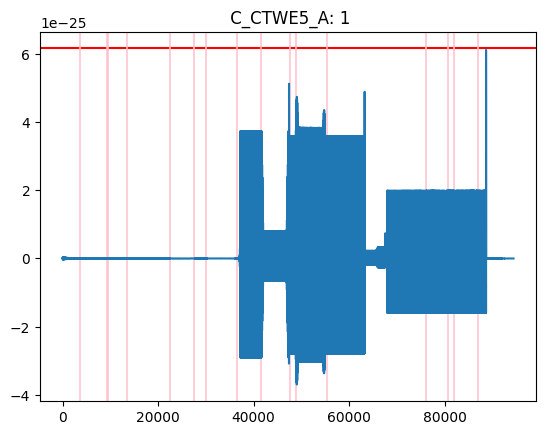

***********************************************************************************************
Sensor: 2  C_CTWE5_B, No Attacks


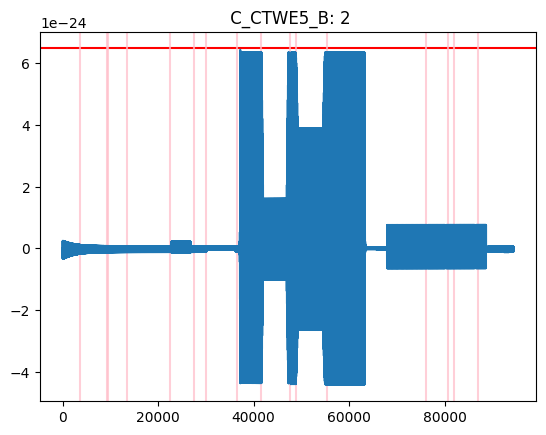

***********************************************************************************************
Sensor: 3  C_CTWE5_C, No Attacks


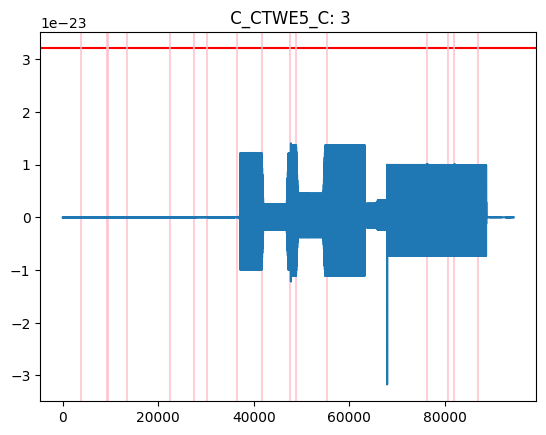

***********************************************************************************************
Sensor: 5  V_PTWE4_AN, No Attacks


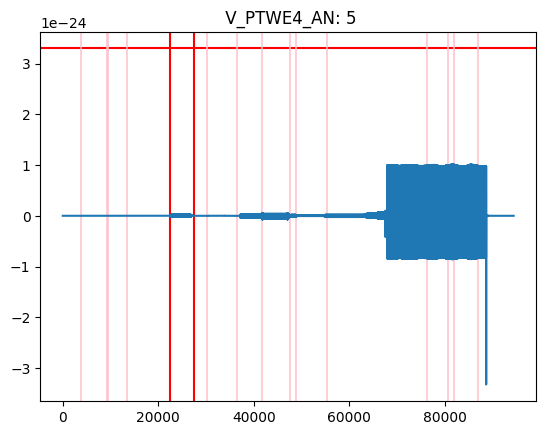

***********************************************************************************************
Sensor: 6  V_PTWE4_BN, Attack Type: PT_ratio, Time Attacked: 5.071426s to 5.900171s


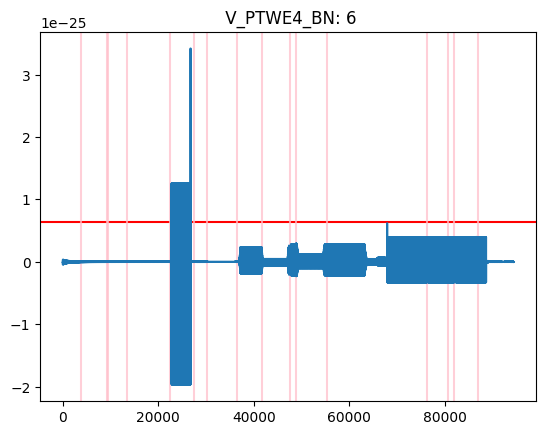

EDD = []
***********************************************************************************************
Sensor: 7  V_PTWE4_CN, No Attacks


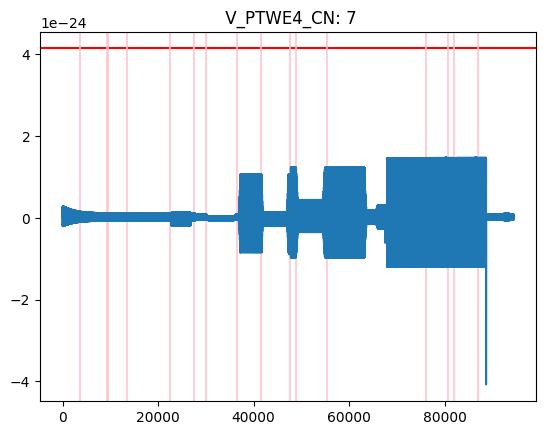

***********************************************************************************************
Sensor: 8  C_CTWE1_A, No Attacks


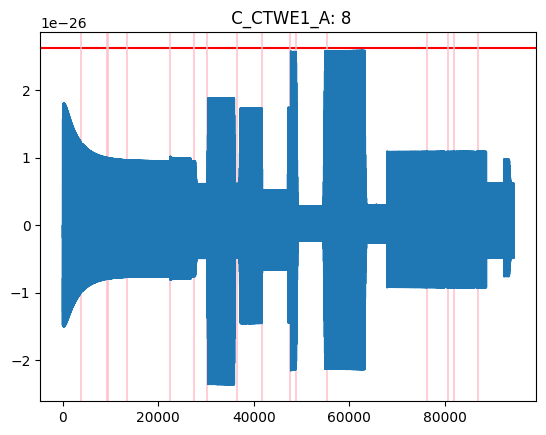

***********************************************************************************************
Sensor: 9  C_CTWE1_B, No Attacks


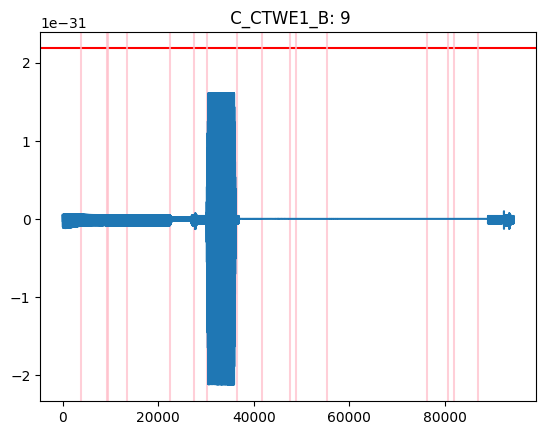

***********************************************************************************************
Sensor: 10  C_CTWE1_C, No Attacks


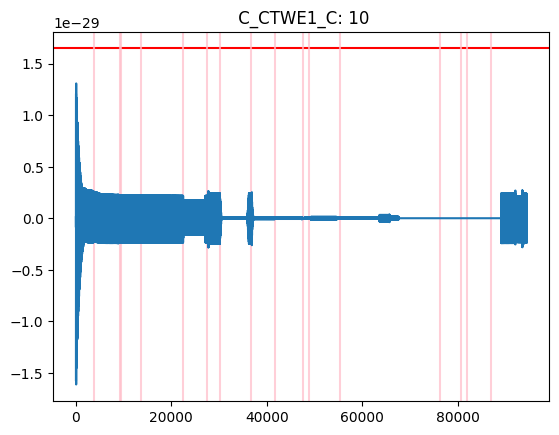

***********************************************************************************************
Sensor: 12  V_PTWE1_AN, No Attacks


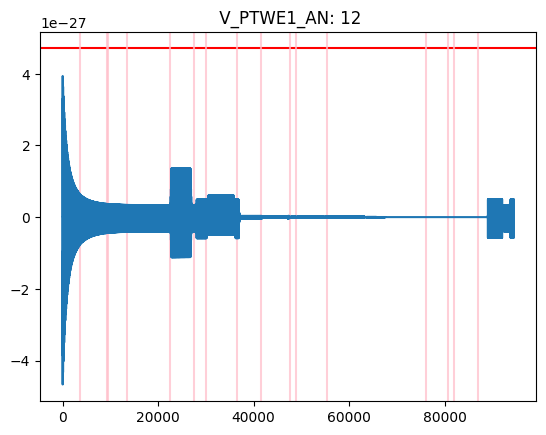

***********************************************************************************************
Sensor: 13  V_PTWE1_BN, No Attacks


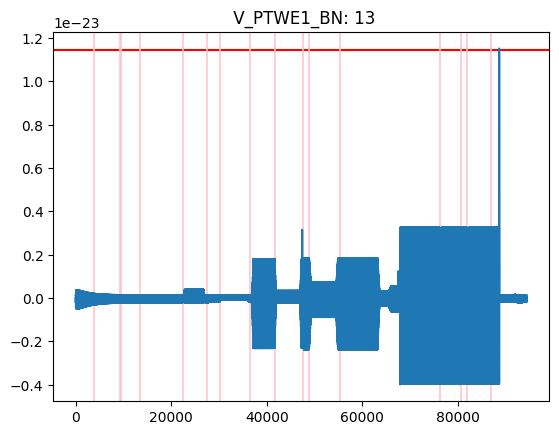

***********************************************************************************************
Sensor: 14  V_PTWE1_CN, No Attacks


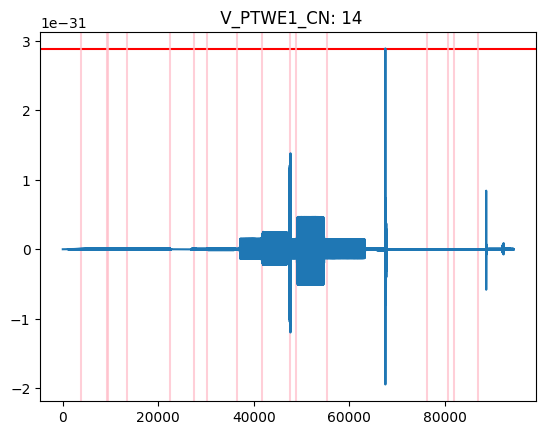

***********************************************************************************************
Sensor: 15  C_CTWE9_A, No Attacks


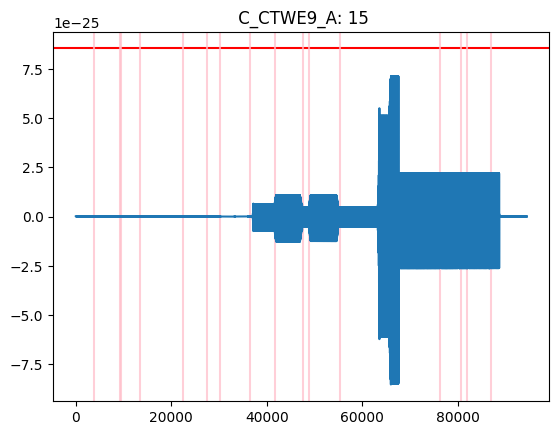

***********************************************************************************************
Sensor: 16  C_CTWE9_B, No Attacks


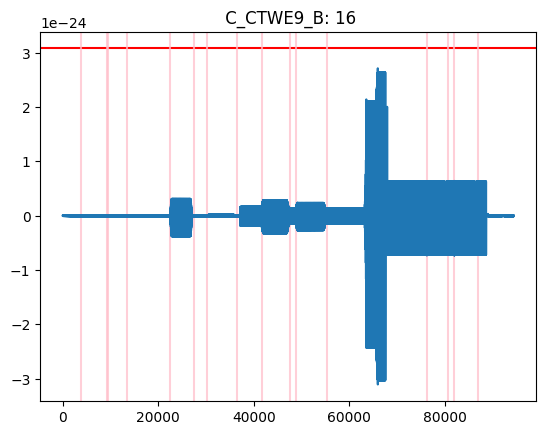

***********************************************************************************************
Sensor: 17  C_CTWE9_C, No Attacks


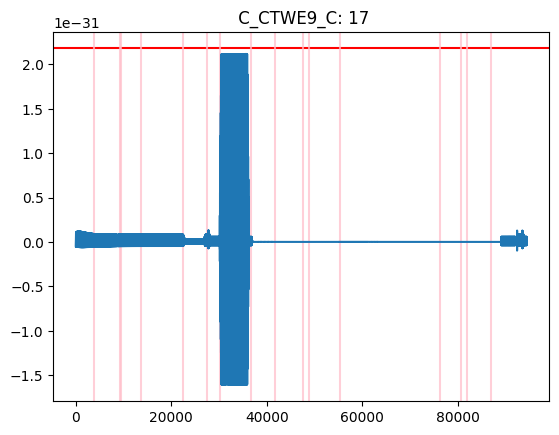

***********************************************************************************************
Sensor: 19  V_PTWE3_AN, No Attacks


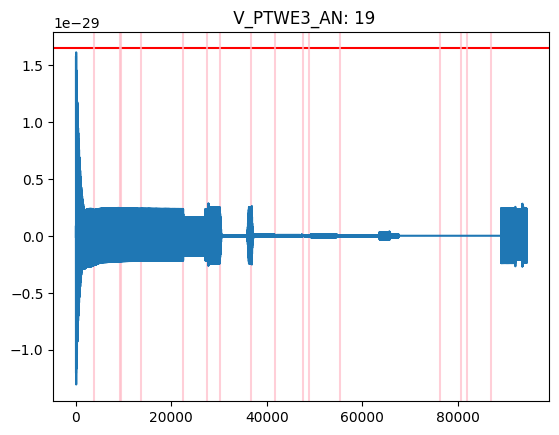

***********************************************************************************************
Sensor: 20  V_PTWE3_BN, No Attacks


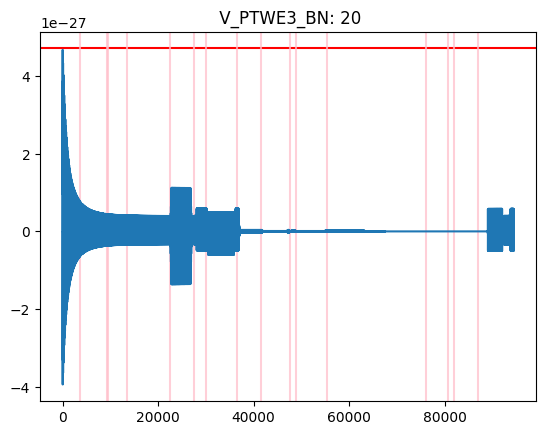

***********************************************************************************************
Sensor: 21  V_PTWE3_CN, No Attacks


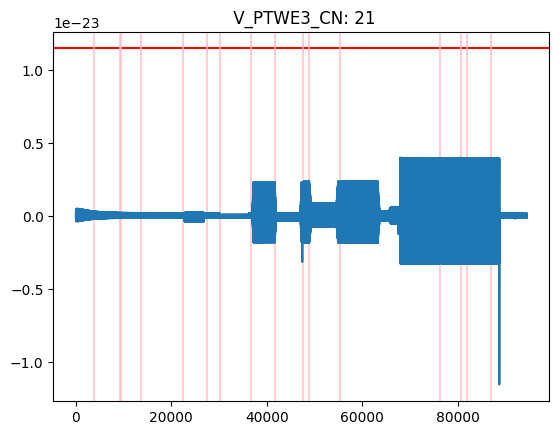

***********************************************************************************************
Sensor: 22  C_CTWE3_A, No Attacks


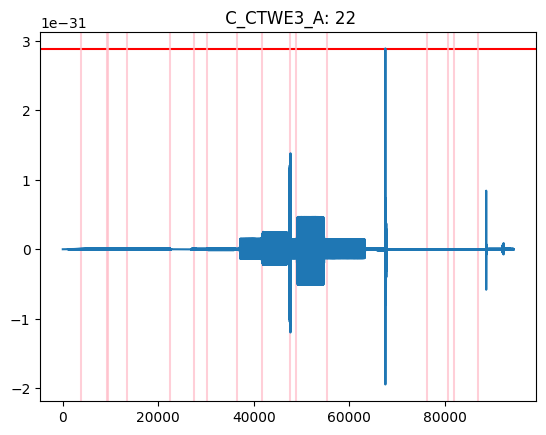

***********************************************************************************************
Sensor: 23  C_CTWE3_B, No Attacks


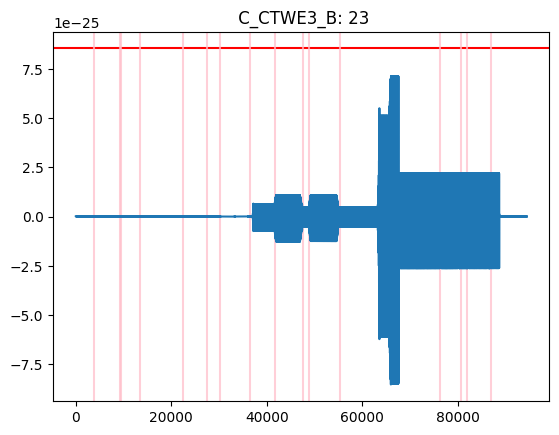

***********************************************************************************************
Sensor: 24  C_CTWE3_C, No Attacks


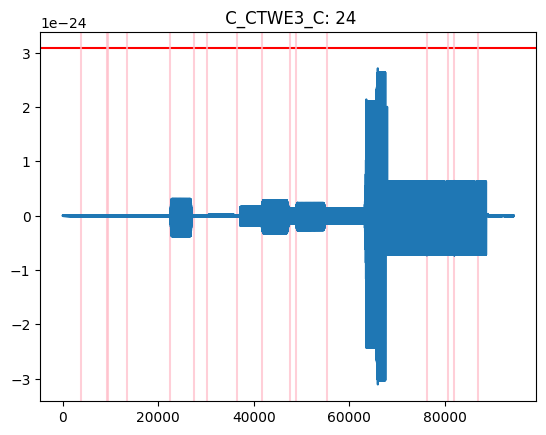

***********************************************************************************************
Sensor: 26  V_PTWE2_AN, No Attacks


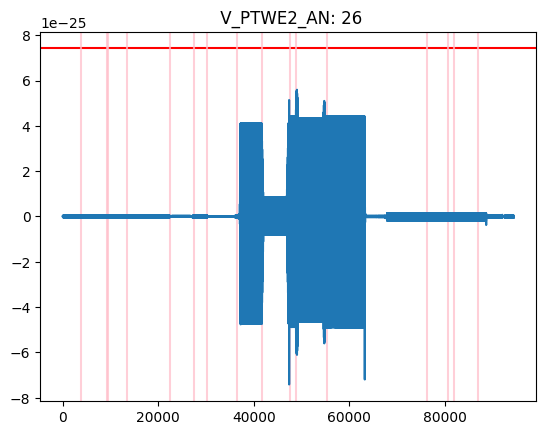

***********************************************************************************************
Sensor: 27  V_PTWE2_BN, No Attacks


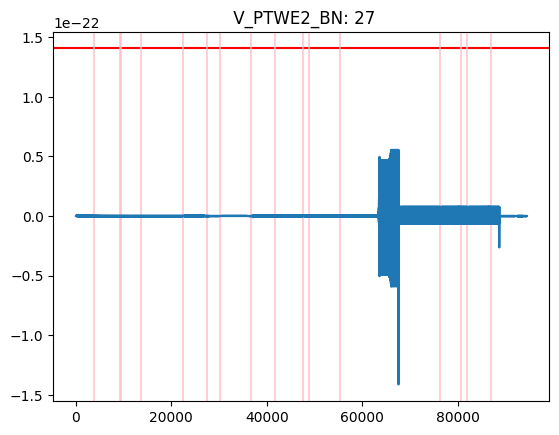

***********************************************************************************************
Sensor: 28  V_PTWE2_CN, No Attacks


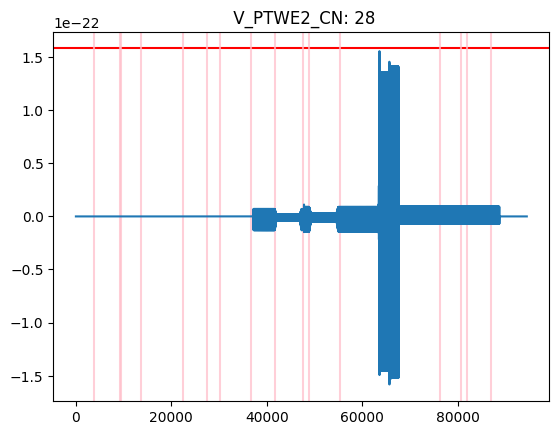

***********************************************************************************************
Sensor: 29  C_CTWE7_A, No Attacks


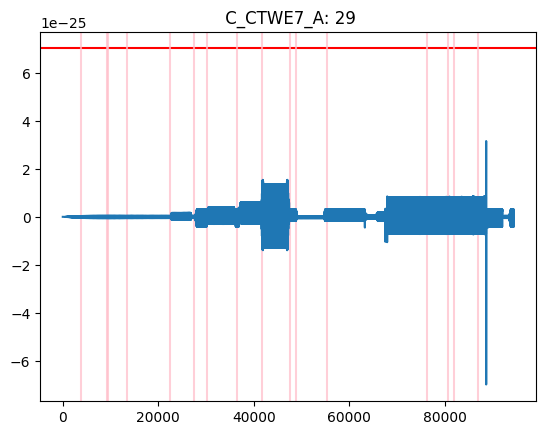

***********************************************************************************************
Sensor: 30  C_CTWE7_B, No Attacks


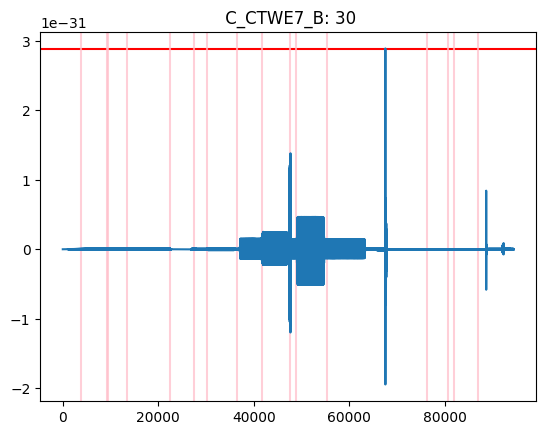

***********************************************************************************************
Sensor: 31  C_CTWE7_C, No Attacks


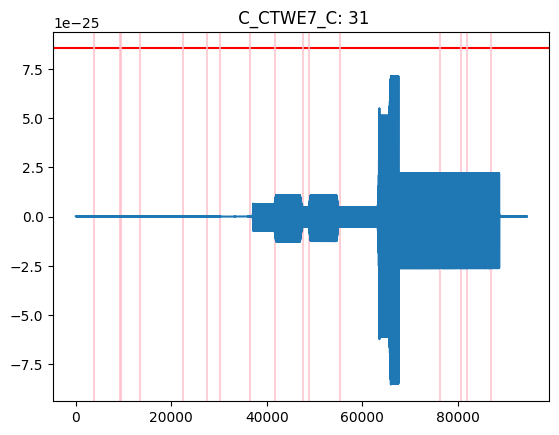

***********************************************************************************************
Sensor: 33  V_PTWE5_AN, No Attacks


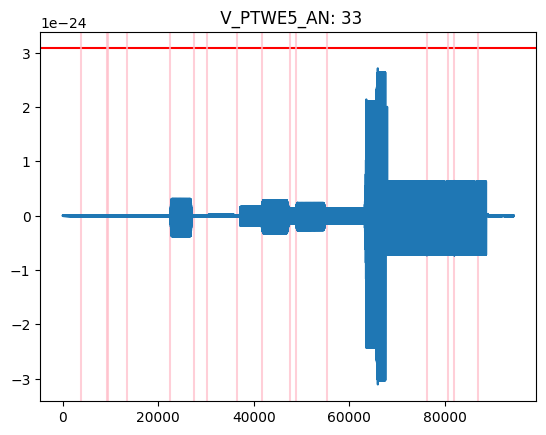

***********************************************************************************************
Sensor: 34  V_PTWE5_BN, No Attacks


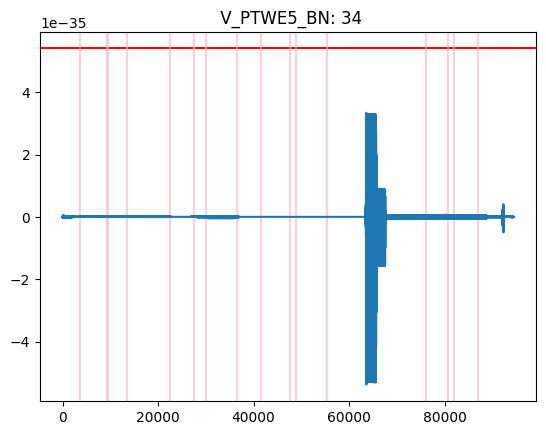

***********************************************************************************************
Sensor: 35  V_PTWE5_CN, No Attacks


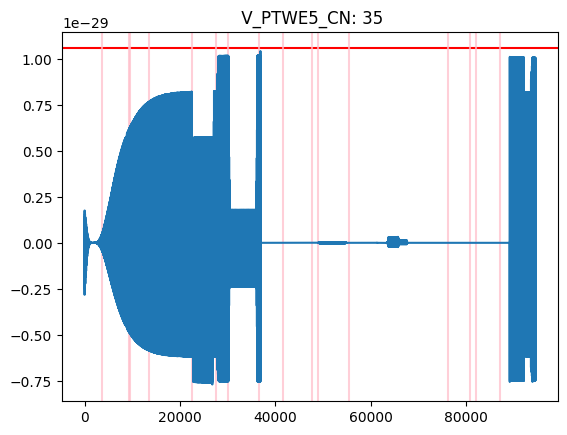

***********************************************************************************************
Sensor: 36  C_CTWE2_A, Attack Type: CT_ratio, Time Attacked: 5.020176s to 5.945587s


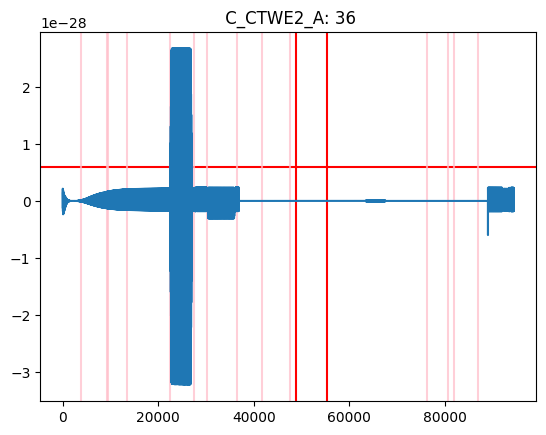

EDD = [-26303, -26302, -26301, -26265, -26264, -26263, -26262, -26261, -26226, -26225, -26224, -26223, -26222, -26221, -26220, -26187, -26186, -26185, -26184, -26183, -26182, -26181, -26180, -26147, -26146, -26145, -26144, -26143, -26142, -26141, -26140, -26107, -26106, -26105, -26104, -26103, -26102, -26101, -26100, -26068, -26067, -26066, -26065, -26064, -26063, -26062, -26061, -26060, -26028, -26027, -26026, -26025, -26024, -26023, -26022, -26021, -26020, -25988, -25987, -25986, -25985, -25984, -25983, -25982, -25981, -25980, -25948, -25947, -25946, -25945, -25944, -25943, -25942, -25941, -25940, -25908, -25907, -25906, -25905, -25904, -25903, -25902, -25901, -25900, -25868, -25867, -25866, -25865, -25864, -25863, -25862, -25861, -25860, -25828, -25827, -25826, -25825, -25824, -25823, -25822, -25821, -25820, -25788, -25787, -25786, -25785, -25784, -25783, -25782, -25781, -25780, -25748, -25747, -25746, -25745, -25744, -25743, -25742, -25741, -25740, -25708, -25707, -25706, -25705, -

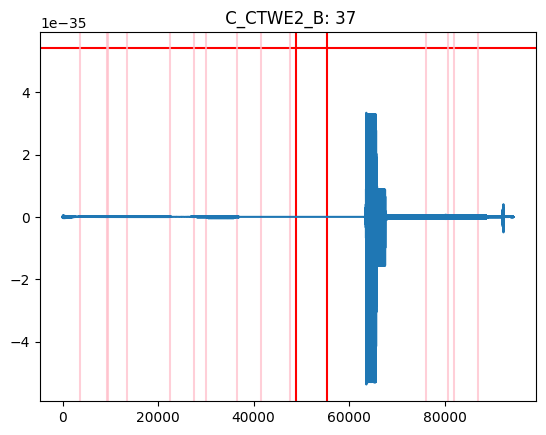

***********************************************************************************************
Sensor: 38  C_CTWE2_C, No Attacks


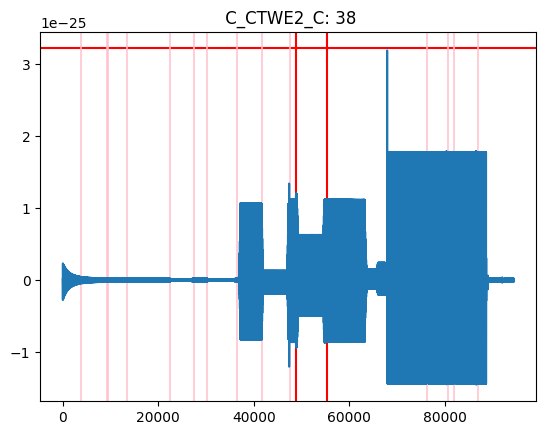

***********************************************************************************************
Sensor: 40  C_CTWE4_A, No Attacks


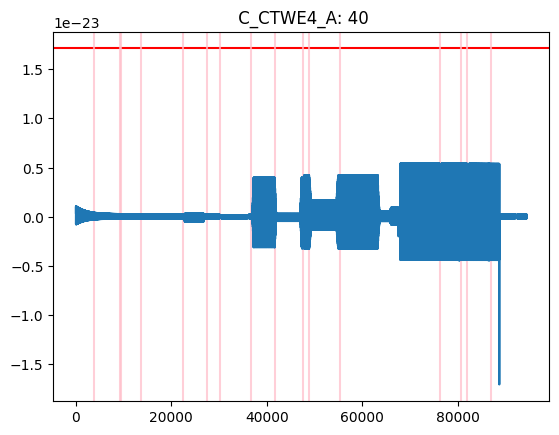

***********************************************************************************************
Sensor: 41  C_CTWE4_B, No Attacks


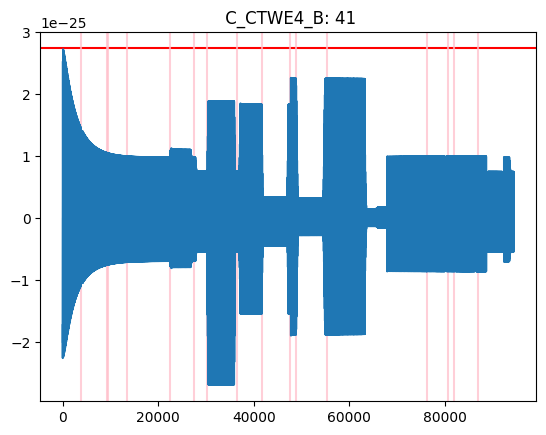

***********************************************************************************************
Sensor: 42  C_CTWE4_C, No Attacks


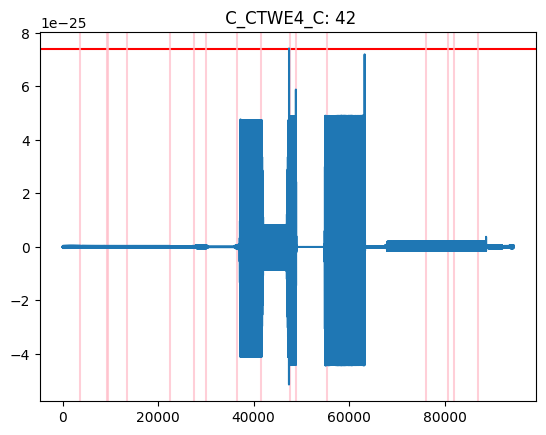

***********************************************************************************************
Sensor: 44  C_CTWE6_A, No Attacks


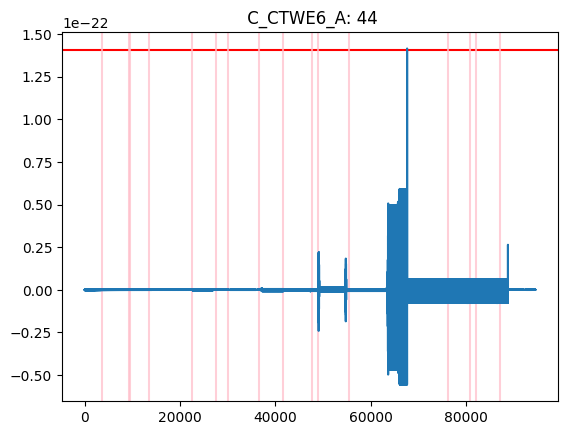

***********************************************************************************************
Sensor: 45  C_CTWE6_B, No Attacks


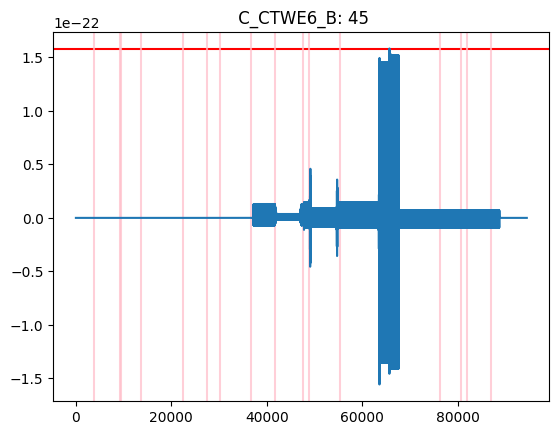

***********************************************************************************************
Sensor: 46  C_CTWE6_C, Attack Type: CT_ratio, Time Attacked: 10.542016s to 11.734925s


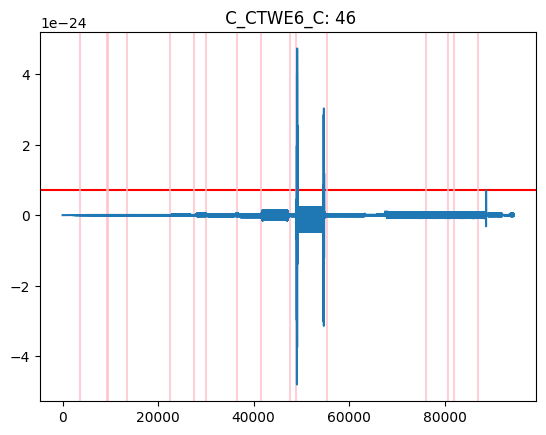

EDD = []
***********************************************************************************************
Sensor: 48  C_CTWE10_A, No Attacks


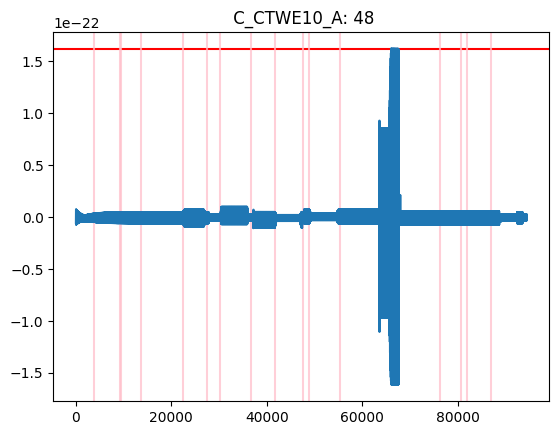

***********************************************************************************************
Sensor: 49  C_CTWE10_B, No Attacks


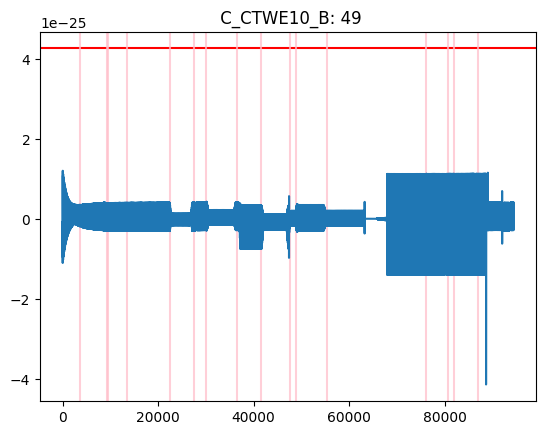

***********************************************************************************************
Sensor: 50  C_CTWE10_C, No Attacks


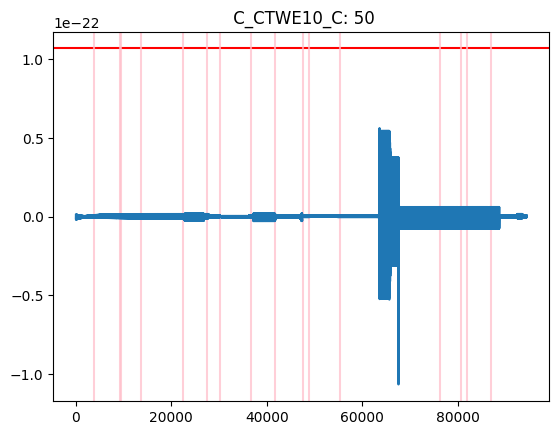

***********************************************************************************************
Sensor: 52  C_CTWE8_A, No Attacks


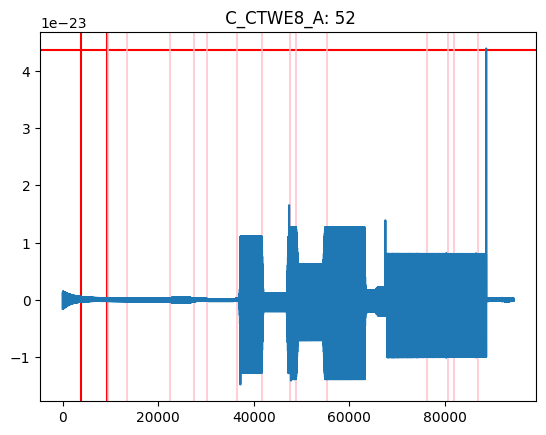

***********************************************************************************************
Sensor: 53  C_CTWE8_B, No Attacks


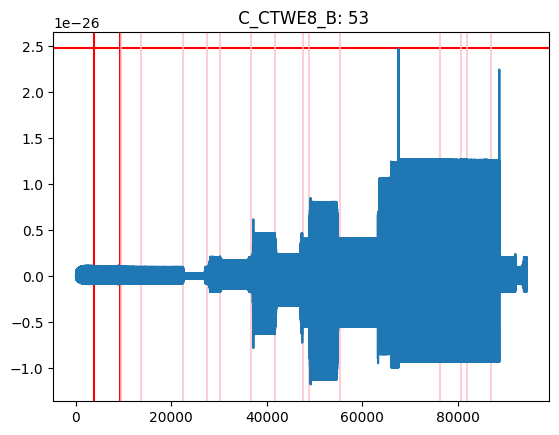

***********************************************************************************************
Sensor: 54  C_CTWE8_C, No Attacks


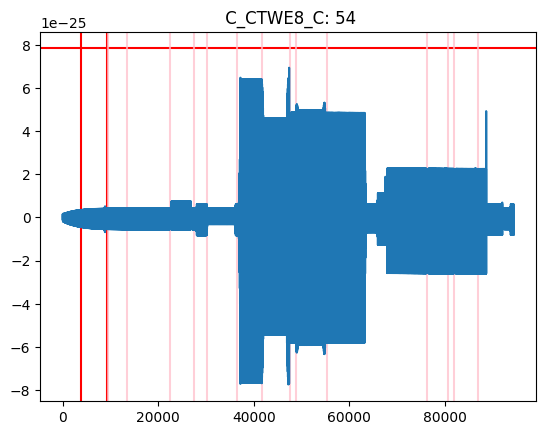

***********************************************************************************************
Sensor: 56  V_PT_DIST1_AN, No Attacks


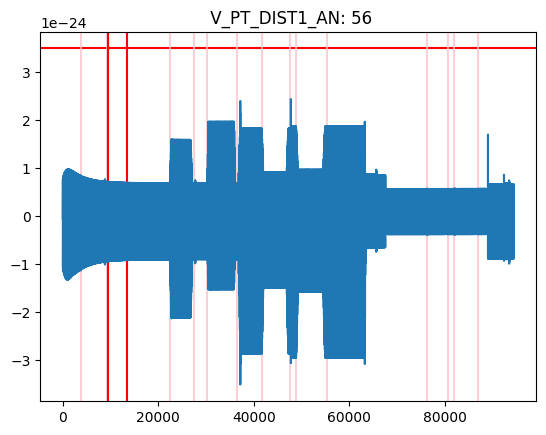

***********************************************************************************************
Sensor: 57  V_PT_DIST1_BN, No Attacks


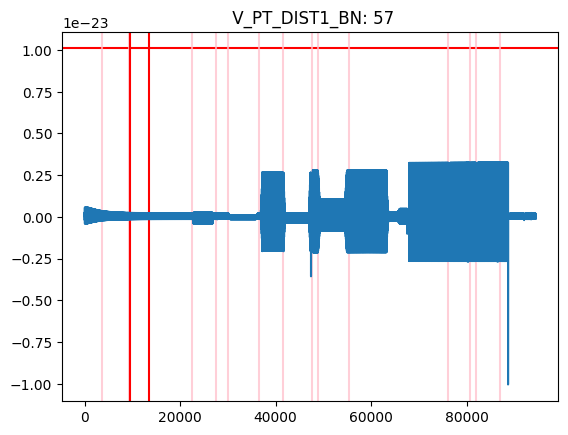

***********************************************************************************************
Sensor: 58  V_PT_DIST1_CN, No Attacks


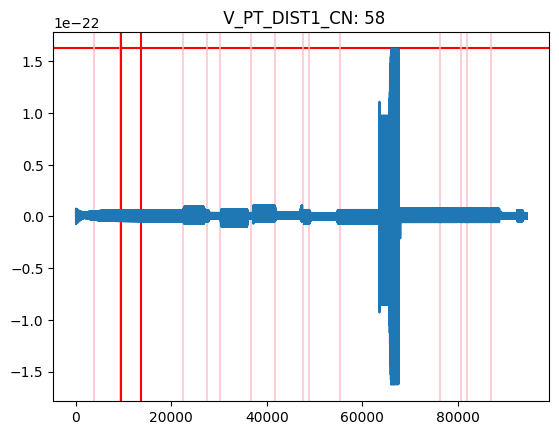

***********************************************************************************************
Sensor: 59  C_CT_DIST1_A, No Attacks


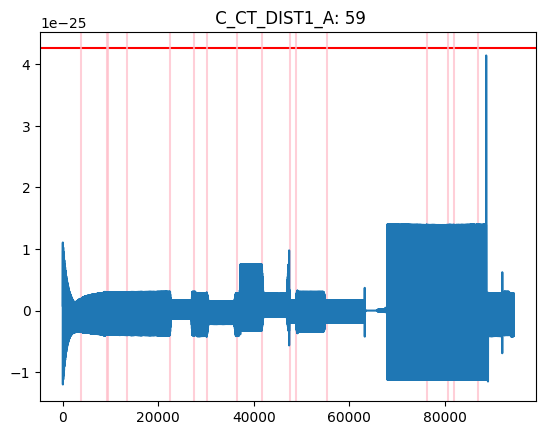

***********************************************************************************************
Sensor: 60  C_CT_DIST1_B, No Attacks


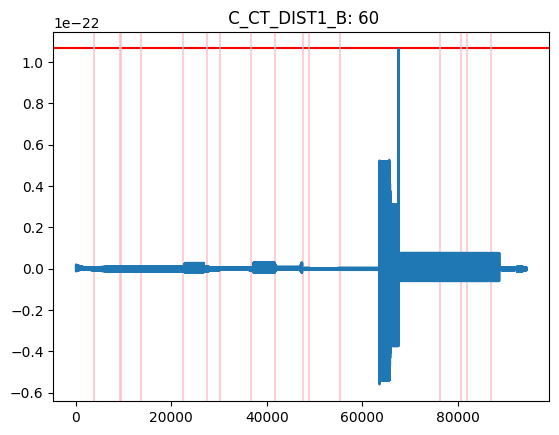

***********************************************************************************************
Sensor: 61  C_CT_DIST1_C, No Attacks


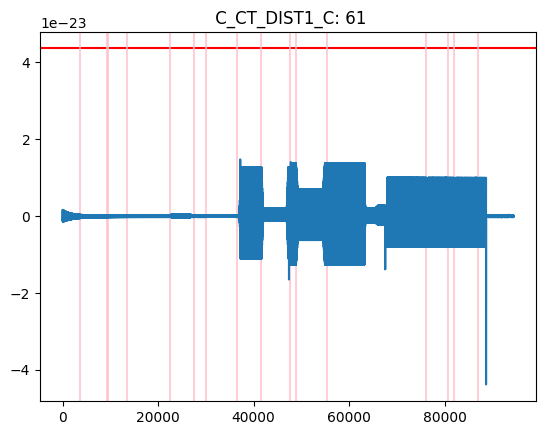

***********************************************************************************************
Sensor: 62  V_PT_DIST2_AN, No Attacks


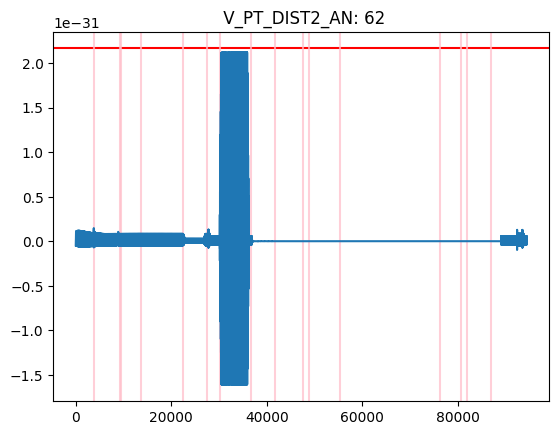

***********************************************************************************************
Sensor: 63  V_PT_DIST2_BN, No Attacks


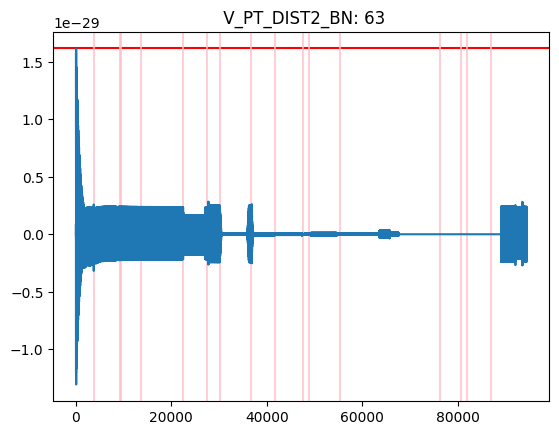

***********************************************************************************************
Sensor: 64  V_PT_DIST2_CN, No Attacks


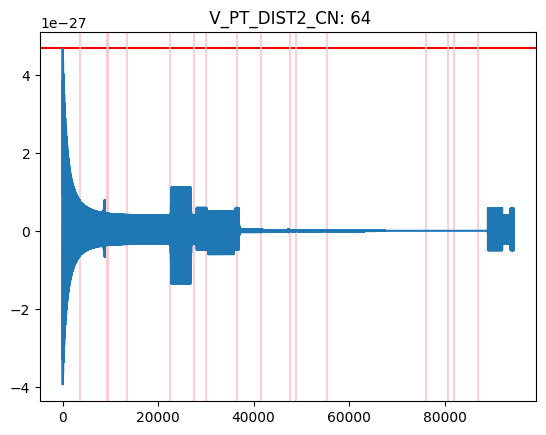

***********************************************************************************************
Sensor: 65  C_CT_DIST2_A, No Attacks


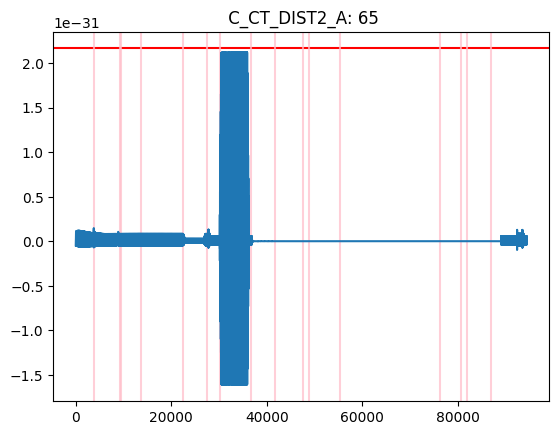

***********************************************************************************************
Sensor: 66  C_CT_DIST2_B, No Attacks


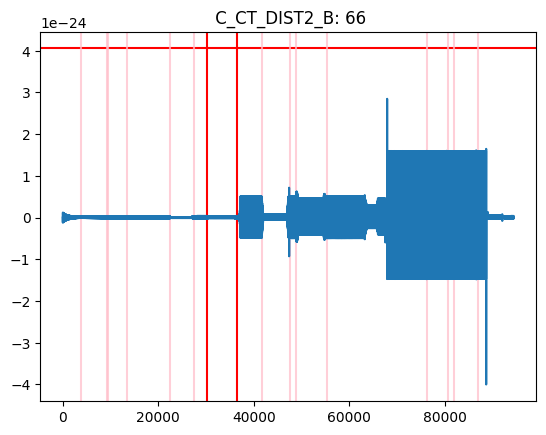

***********************************************************************************************
Sensor: 67  C_CT_DIST2_C, No Attacks


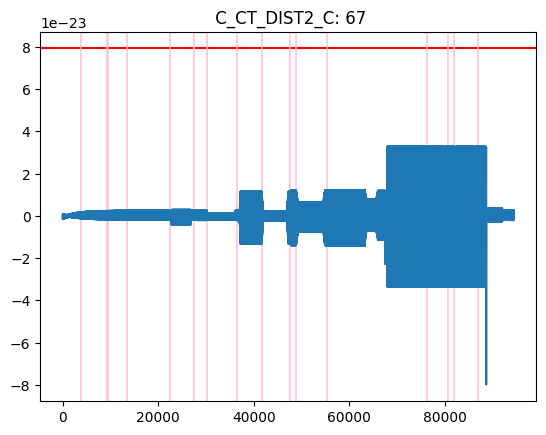

***********************************************************************************************
Sensor: 68  V_PT_FDR3_AN, No Attacks


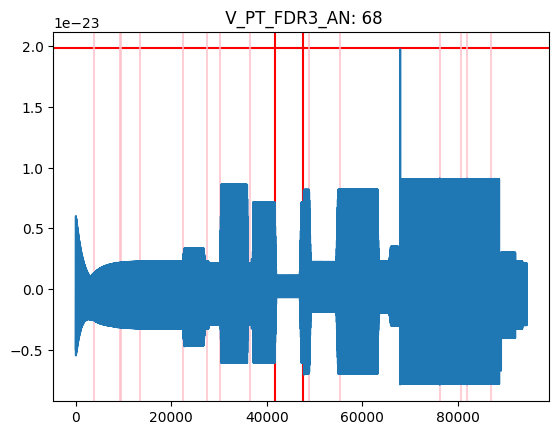

***********************************************************************************************
Sensor: 69  V_PT_FDR3_BN, No Attacks


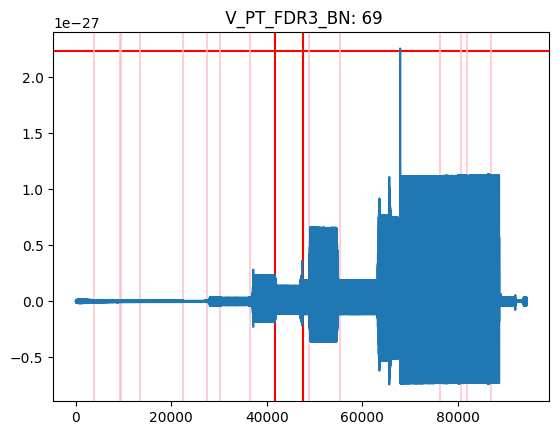

***********************************************************************************************
Sensor: 70  V_PT_FDR3_CN, No Attacks


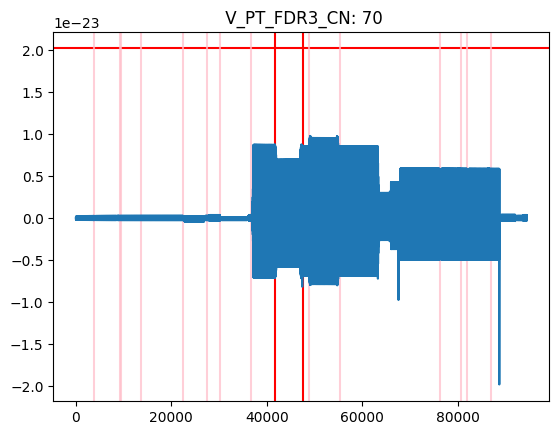

***********************************************************************************************
Sensor: 71  C_CT_FDR3_A, No Attacks


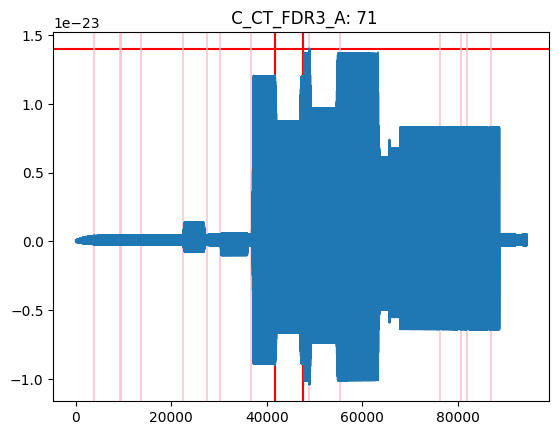

***********************************************************************************************
Sensor: 72  C_CT_FDR3_B, No Attacks


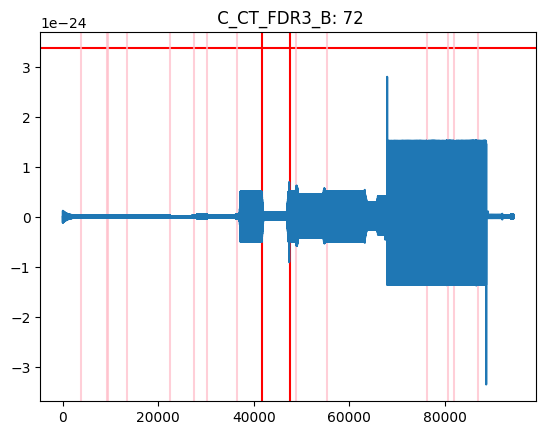

***********************************************************************************************
Sensor: 73  C_CT_FDR3_C, No Attacks


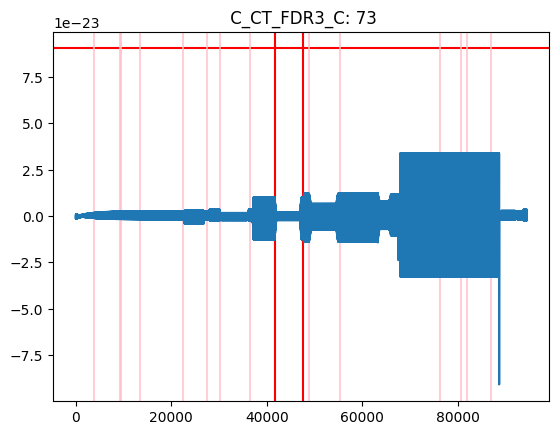

***********************************************************************************************
Sensor: 74  V_PT_FDR1_AN, No Attacks


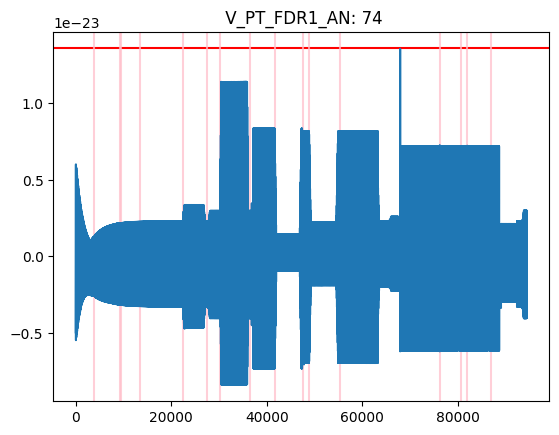

***********************************************************************************************
Sensor: 75  V_PT_FDR1_BN, No Attacks


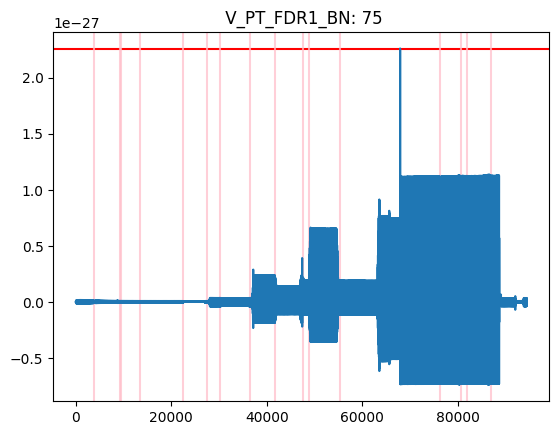

***********************************************************************************************
Sensor: 76  V_PT_FDR1_CN, No Attacks


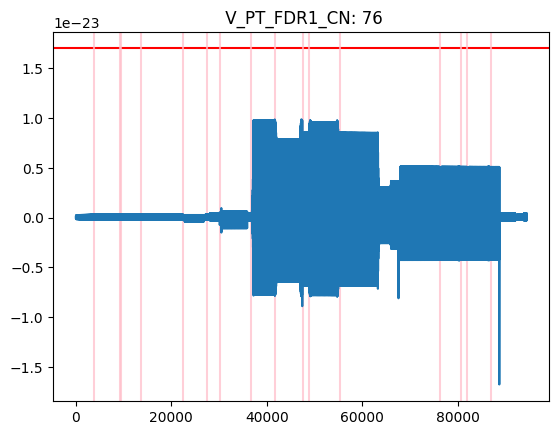

***********************************************************************************************
Sensor: 77  C_CT_FDR1_A, No Attacks


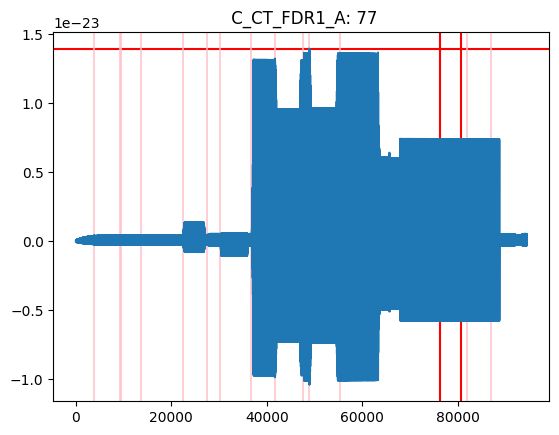

***********************************************************************************************
Sensor: 78  C_CT_FDR1_B, No Attacks


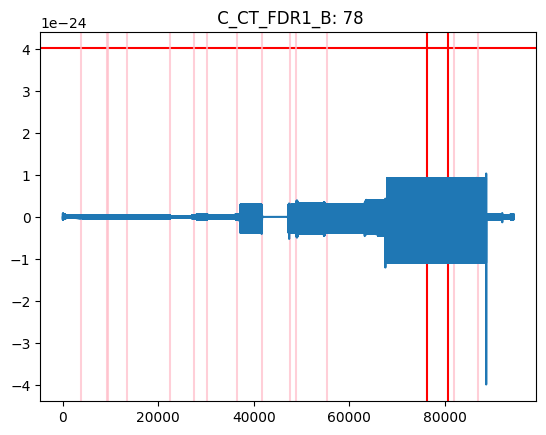

***********************************************************************************************
Sensor: 79  C_CT_FDR1_C, Attack Type: CT_ratio, Time Attacked: 9.057859s to 10.108269s


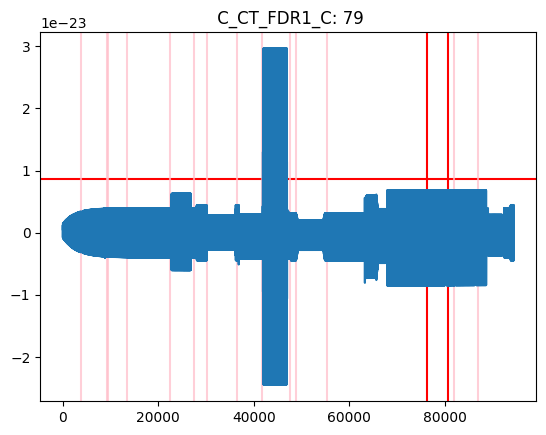

EDD = [-34282, -34281, -34280, -34279, -34278, -34246, -34245, -34244, -34243, -34242, -34241, -34240, -34239, -34238, -34208, -34207, -34206, -34205, -34204, -34203, -34202, -34201, -34200, -34199, -34168, -34167, -34166, -34165, -34164, -34163, -34162, -34161, -34160, -34159, -34128, -34127, -34126, -34125, -34124, -34123, -34122, -34121, -34120, -34119, -34088, -34087, -34086, -34085, -34084, -34083, -34082, -34081, -34080, -34079, -34048, -34047, -34046, -34045, -34044, -34043, -34042, -34041, -34040, -34039, -34008, -34007, -34006, -34005, -34004, -34003, -34002, -34001, -34000, -33999, -33968, -33967, -33966, -33965, -33964, -33963, -33962, -33961, -33960, -33959, -33928, -33927, -33926, -33925, -33924, -33923, -33922, -33921, -33920, -33919, -33888, -33887, -33886, -33885, -33884, -33883, -33882, -33881, -33880, -33879, -33848, -33847, -33846, -33845, -33844, -33843, -33842, -33841, -33840, -33839, -33808, -33807, -33806, -33805, -33804, -33803, -33802, -33801, -33800, -33799, -

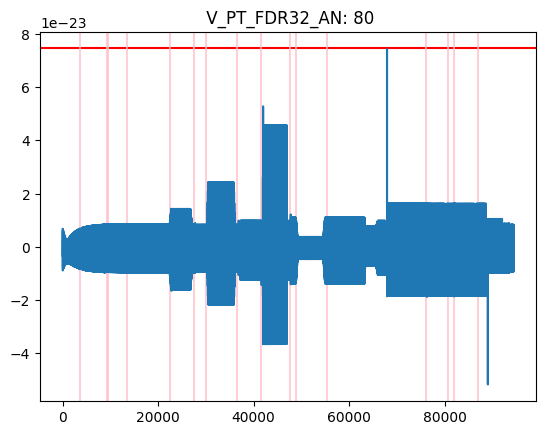

***********************************************************************************************
Sensor: 81  V_PT_FDR32_BN, No Attacks


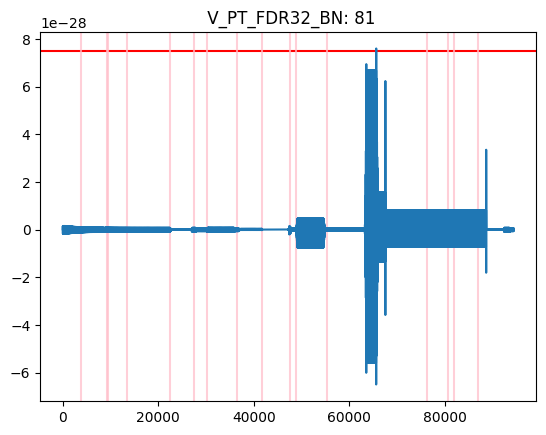

***********************************************************************************************
Sensor: 82  V_PT_FDR32_CN, No Attacks


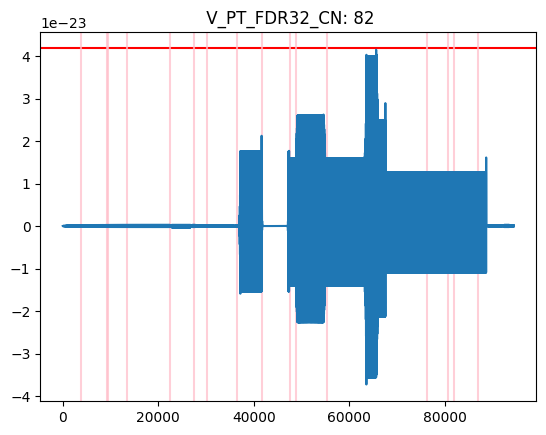

***********************************************************************************************
Sensor: 83  C_CT_FDR32_A, No Attacks


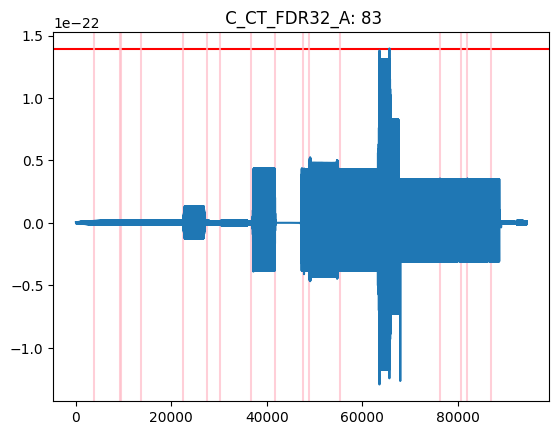

***********************************************************************************************
Sensor: 84  C_CT_FDR32_B, No Attacks


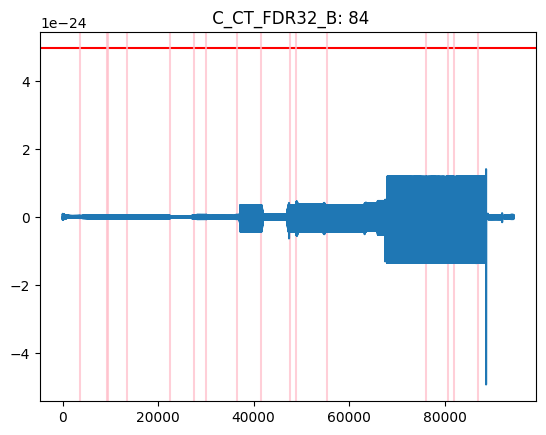

***********************************************************************************************
Sensor: 85  C_CT_FDR32_C, No Attacks


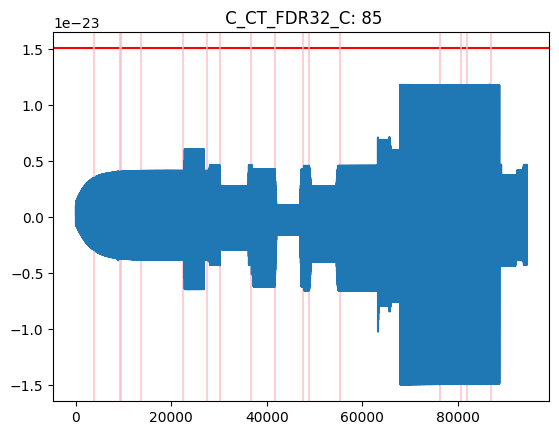

***********************************************************************************************
Sensor: 86  V_PT_FDR12_AN, No Attacks


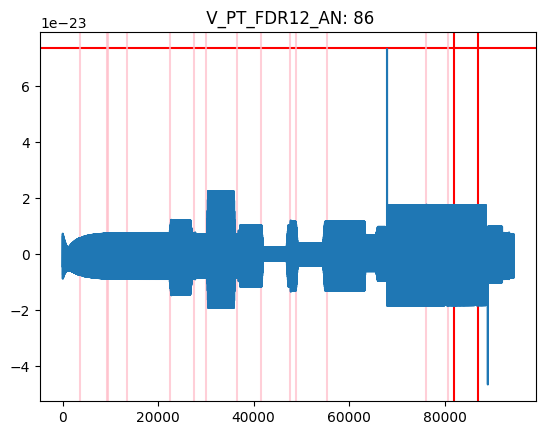

***********************************************************************************************
Sensor: 87  V_PT_FDR12_BN, No Attacks


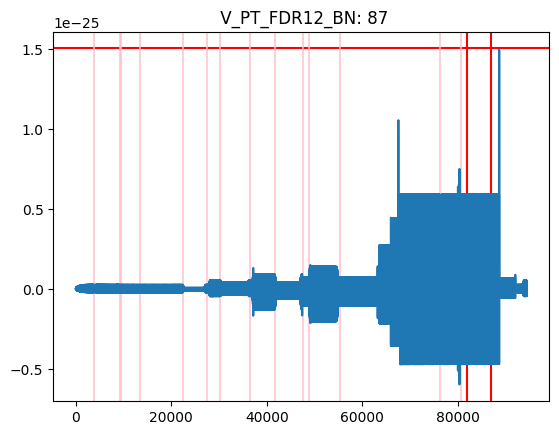

***********************************************************************************************
Sensor: 88  V_PT_FDR12_CN, No Attacks


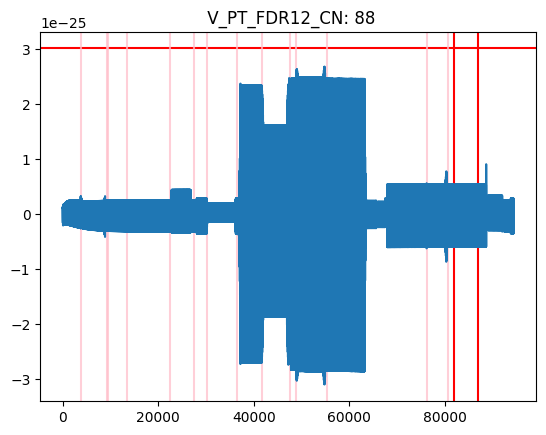

***********************************************************************************************
Sensor: 89  C_CT_FDR12_A, No Attacks


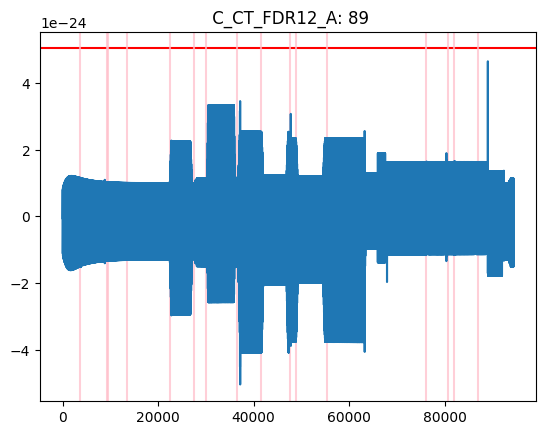

***********************************************************************************************
Sensor: 90  C_CT_FDR12_B, No Attacks


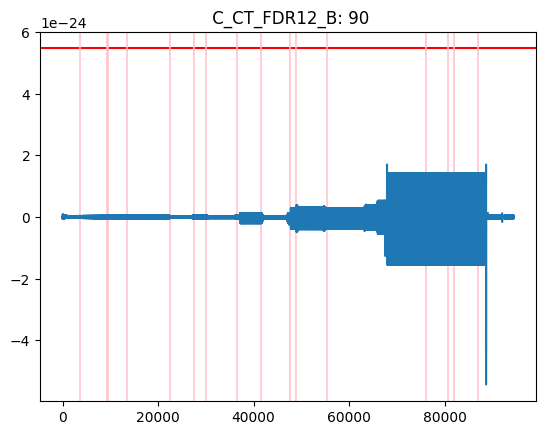

***********************************************************************************************
Sensor: 91  C_CT_FDR12_C, No Attacks


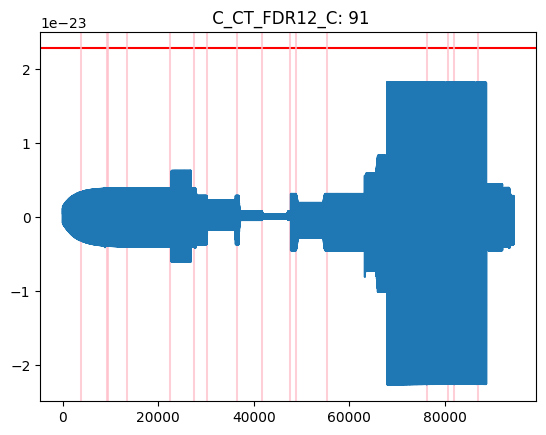

***********************************************************************************************


IndexError: ignored

In [58]:
at_sensors = []
at_neighbor = {}
for index, i in enumerate(rsum_listc):
    print("***********************************************************************************************")
    attack_in = []
    for indices, j in enumerate(i):
      if j > thresholdsc[index]:
        attack_in += [indices]
    if len(attack_in) > 3:
      start = (df_test['Time'][attack_in[0]+1201+window+w-1])/1e6
      end = (df_test['Time'][attack_in[-1]+1201+window+w-1])/1e6
      a_type = ""
      if cols[things[index]-1][1] == "C":
        a_type = "CT_ratio"
      elif cols[things[index]-1][1] == "V":
        a_type = "PT_ratio"
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, Attack Type: {a_type}, Time Attacked: {start}s to {end}s")
      at_sensors += [things[index]]
      at_neighbor[things[index]] = attack_in
      atk = True
    else:
      atk = False
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, No Attacks")


    plt.title(f"{cols[things[index]-1]}: {things[index]}")
    plt.axhline(thresholdsc[index], color='red')


    if things[index] in attack_dict:
      attack_indices = df_test.index[(df_test['Time'] >= attack_dict[things[index]][0] * 1e6) & (df_test['Time'] <= attack_dict[things[index]][1] * 1e6)] - 1201
      for start, end in all_attack_indices:
        if attack_indices[0] == start:
          set_zero = np.zeros(len(data_test)-window-w+1)
          for indices, j in enumerate(i):
            if j > thresholdsc[index]:
              set_zero[indices]=1
          start_w = start-window-w
          end_w = end+window+w-1

          EDD = expectation_detection_delay(set_zero,start_w)
       
          plt.axvline(start_w, color='red')
          plt.axvline(end_w, color='red')
        else:
          start_w = start-window-w
          end_w = end+window+w-1
          plt.axvline(start_w, color='pink', alpha=0.75)
          plt.axvline(end_w, color='pink', alpha=0.75)
    else:
       for start, end in all_attack_indices:
          start_w = start-window-w
          end_w = end+window+w-1
          plt.axvline(start_w, color='pink', alpha=0.75)
          plt.axvline(end_w, color='pink', alpha=0.75)
    
    plt.plot(i)
    plt.show()
    if atk:
      print(f"EDD = {EDD}")

In [60]:
at_sensors

[6, 36, 46, 79]

In [61]:
order_attack = ['CT', 'Vphase', 'Cphase', 'GPS', 'GPS', 'CT', 'PT']

In [62]:
hops = {}
types = 1.1
for key, value in attack_dict.items():
  if types == value[0]:
    if value[1] not in hops:
      hops[value[1]]= [key]
    else:
      hops[value[1]] += [key]
  else:
    types = value[0]
    hops[value[1]]= [key]

In [63]:
stu = []
for i in hops:
  stu += [i]

In [64]:
hops

{2.1: [52, 53, 54, 55],
 3.0: [56, 57, 58],
 5.9: [5],
 7.8: [66],
 10.1: [68, 69, 70, 71, 72, 73],
 11.7: [36, 37, 38, 39],
 17.0: [77, 78, 79],
 18.3: [86, 87, 88]}

In [65]:
stu

[2.1, 3.0, 5.9, 7.8, 10.1, 11.7, 17.0, 18.3]

In [66]:
hops[5.9]

[5]

In [67]:
at_sensors

[6, 36, 46, 79]

In [68]:
for i in at_neighbor:
  print(i)

6
36
46
79


In [69]:
all_attack_indices

{(4080, 8879),
 (9840, 13199),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)}

In [70]:
all_attack_times

{(1.1, 2.1),
 (2.3, 3.0),
 (5.0, 5.9),
 (6.6, 7.8),
 (9.0, 10.1),
 (10.5, 11.7),
 (16.2, 17.0),
 (17.4, 18.3)}

In [71]:
all_attack_indice = []
for i in all_attack_indices:
  all_attack_indice += [i]
sorted(all_attack_indice)

[(4080, 8879),
 (9840, 13199),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)]

In [72]:
all_attack_indice.remove((9840, 13199))
    
all_attack_indice

[(4080, 8879),
 (30480, 36239),
 (82320, 86639),
 (76560, 80399),
 (49200, 54959),
 (22800, 27119),
 (42000, 47279)]

In [73]:
stu.remove(3.0)

In [74]:
n = 0
for start, end in sorted(all_attack_indice):
  attack_list = []
  print("***********************************************************************************************")
  print(f'For the {order_attack[n]} attack starting at index: {start} and ending at index: {end}')

  for key, values in at_neighbor.items():
    for i in values:
      if i+350 > start and i+350 < end:
        if key not in attack_list:
          attack_list += [key]
  print(f'These were the sensors that were detected inside that particular attack interval: {attack_list}')
  for atta in attack_list:
    hop = []
    for j in hops[stu[n]]:
      if j not in emptyr:
        hop += [j]
        hop += adj_list[j]
      else:
        hop +=[j]
    if atta in hop:
      print(f'Attacked has been detected at sensor: {atta}')
    else:
      print(f'{atta} is a False Positive')
  if len(attack_list) > 0:
    print(f'This is the 1-hop neighborhood that we are interested in {sorted(hop)}')
  n += 1

***********************************************************************************************
For the CT attack starting at index: 4080 and ending at index: 8879
These were the sensors that were detected inside that particular attack interval: []
***********************************************************************************************
For the Vphase attack starting at index: 22800 and ending at index: 27119
These were the sensors that were detected inside that particular attack interval: [6, 36]
6 is a False Positive
36 is a False Positive
This is the 1-hop neighborhood that we are interested in [5, 12, 19, 26, 62]
***********************************************************************************************
For the Cphase attack starting at index: 30480 and ending at index: 36239
These were the sensors that were detected inside that particular attack interval: []
***********************************************************************************************
For the GPS attack

In [75]:
all_attack_indice

[(4080, 8879),
 (30480, 36239),
 (82320, 86639),
 (76560, 80399),
 (49200, 54959),
 (22800, 27119),
 (42000, 47279)]

In [76]:
FPR = []
for sensor, ind in at_neighbor.items():
  for i in ind:
    x = i
    if (x > 4080-350 and x< 8879+350) or (x>30480-350 and x<36239+350) or (x>82320-350 and x<86639+350) or (x>76560-350 and x<80399+350) or (x>49200-350 and x<54959+350) or (x>22800-350 and x<27119+350) or (x>42000-350 and x<47279+350):
      continue
    else:
      print(i)
      print(sensor)
      FPR += [(sensor,i)]


In [77]:
len(FPR)

0

In [78]:
157*208

32656

In [79]:
at = [62, 64, 80, 82, 86, 87, 88]+[59, 60, 61, 71, 72, 73, 77, 78, 79]+[5, 12, 19, 26, 62]+[52, 53, 54]+[58, 68, 70, 76]
len(at)

28

In [81]:
at_sensors

[6, 36, 46, 79]

In [82]:
neighbors = []
for i in attack_dict:
  neighbors += [i]
  if i not in [55,39]:
    for j in adj_list[i]:
      neighbors += [j]

In [83]:
for i in at_sensors:
  if i in neighbors:
    print("Yes")
  else:
    print("Fail")
  

Fail
Yes
Yes
Yes


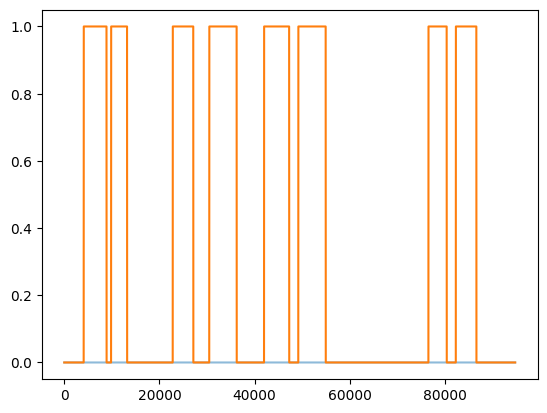

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE5_A :0 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


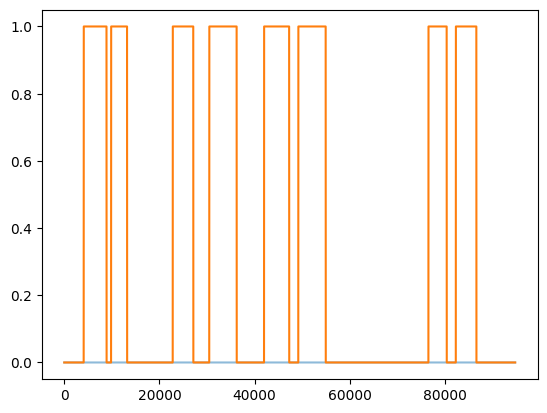

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE5_B :1 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


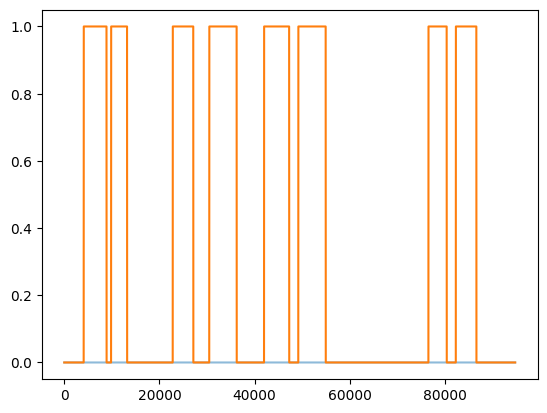

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE5_C :2 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


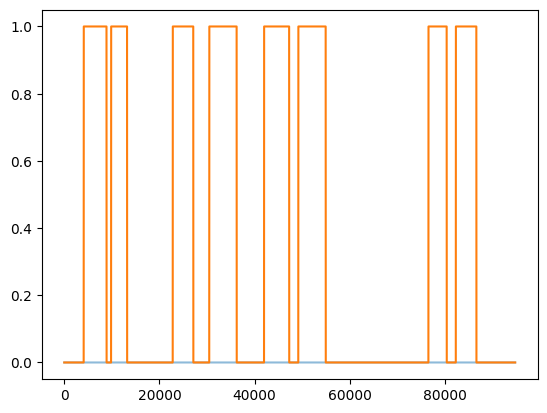

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE4_AN :4 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


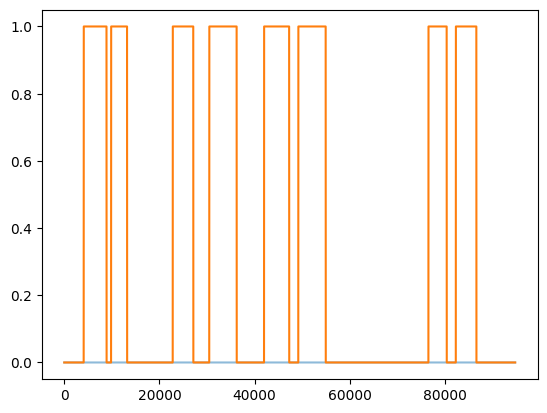

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE4_BN :5 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


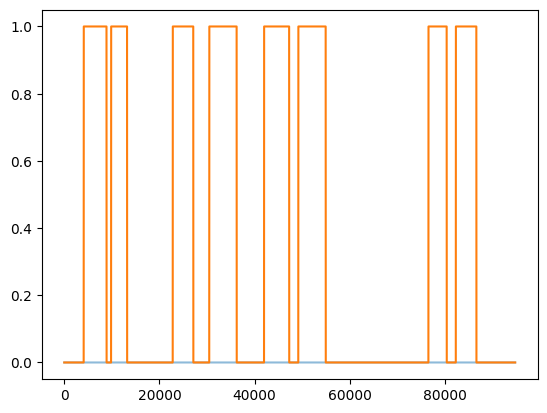

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE4_CN :6 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


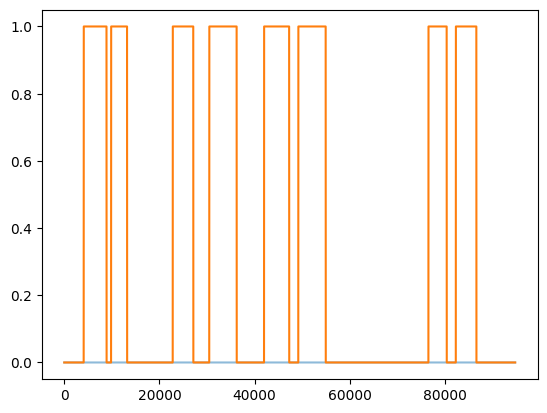

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE1_A :7 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


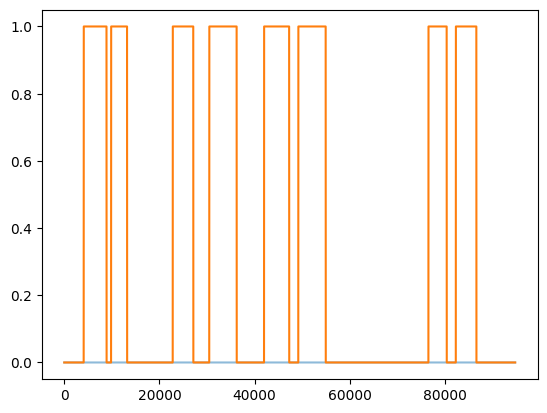

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE1_B :8 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


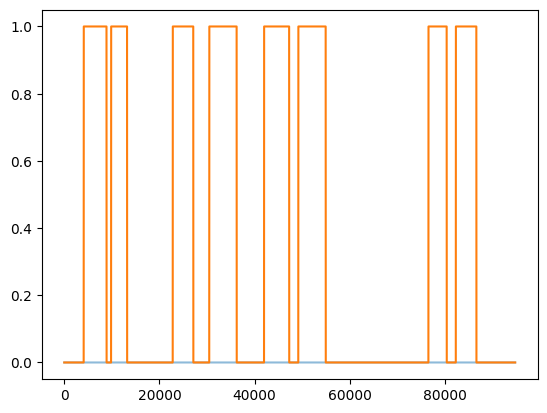

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE1_C :9 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


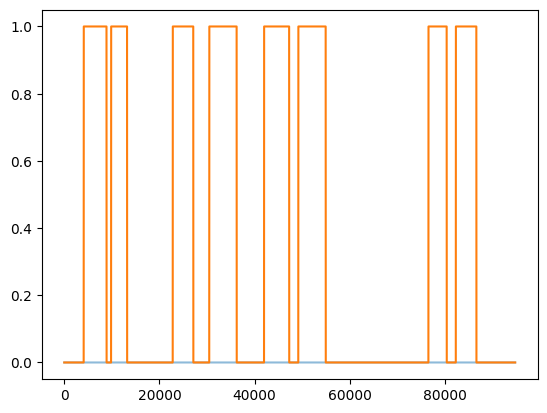

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE1_AN :11 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


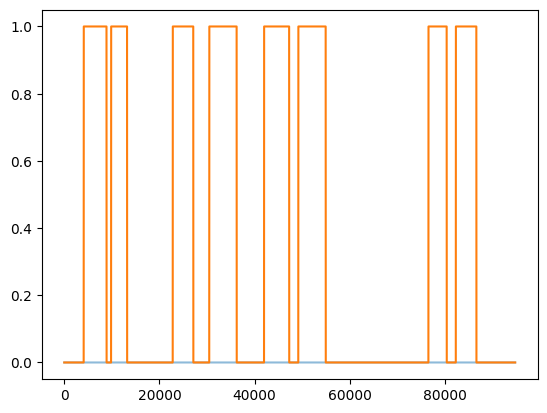

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE1_BN :12 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


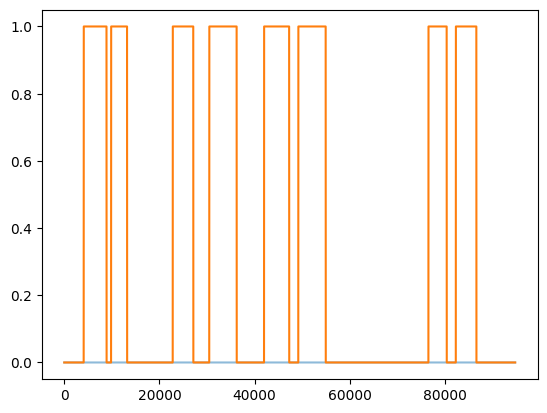

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE1_CN :13 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


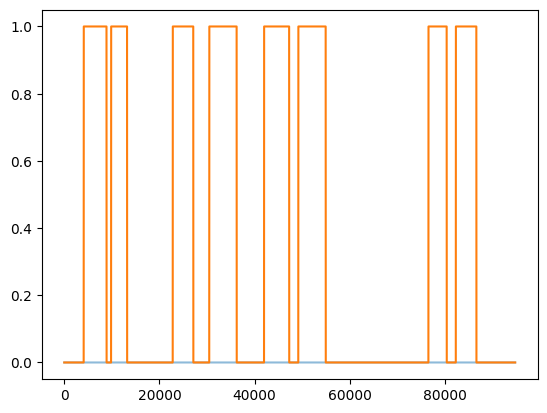

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE9_A :14 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


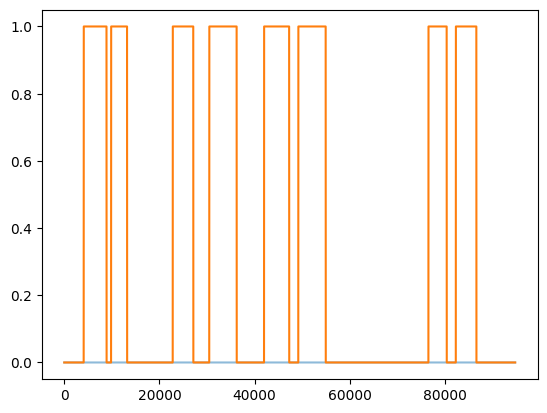

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE9_B :15 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


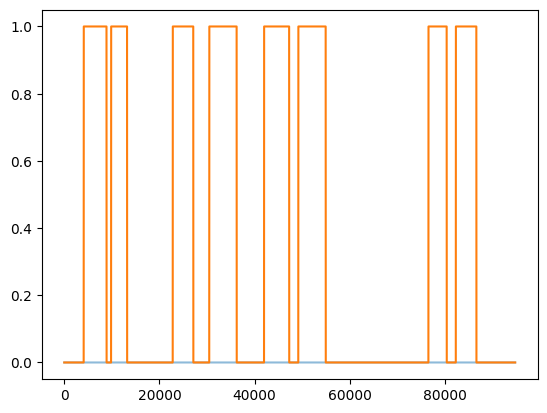

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE9_C :16 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


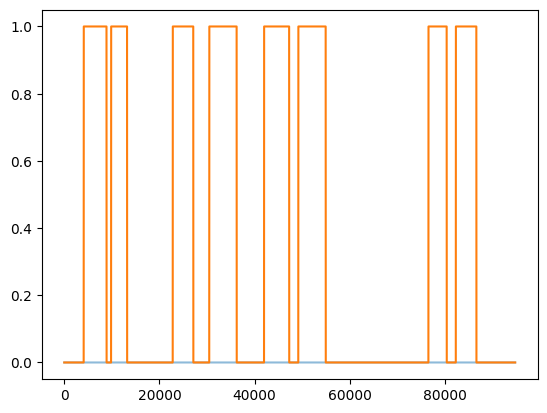

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE3_AN :18 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


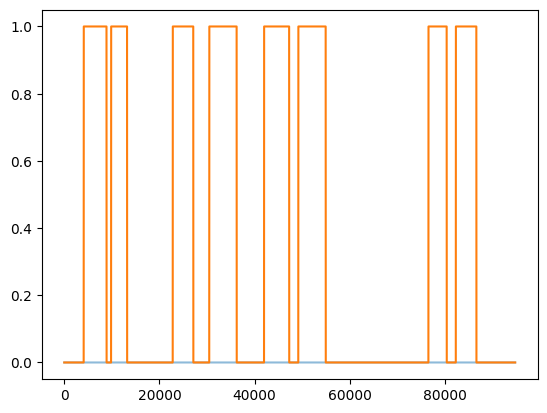

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE3_BN :19 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


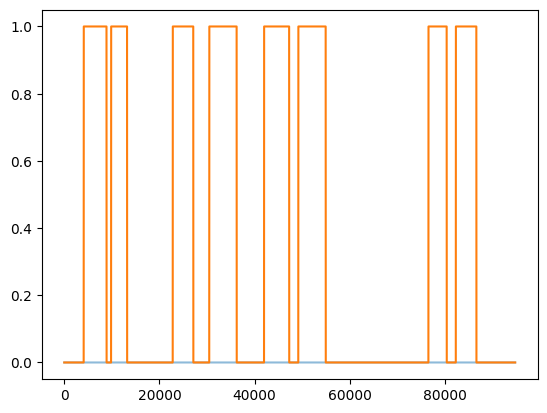

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE3_CN :20 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


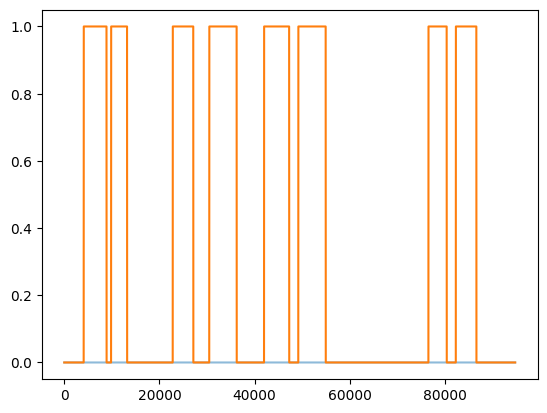

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE3_A :21 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


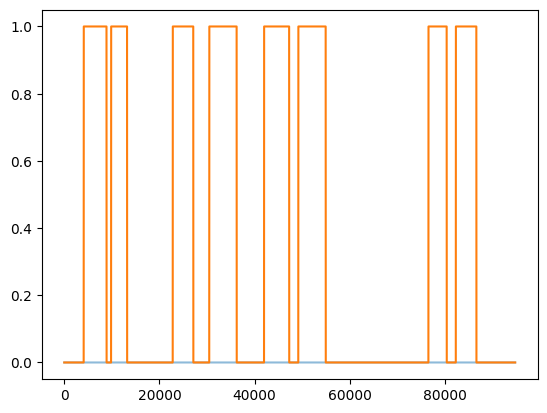

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE3_B :22 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


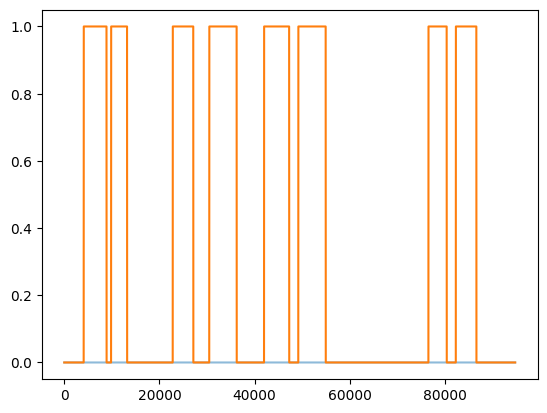

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE3_C :23 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


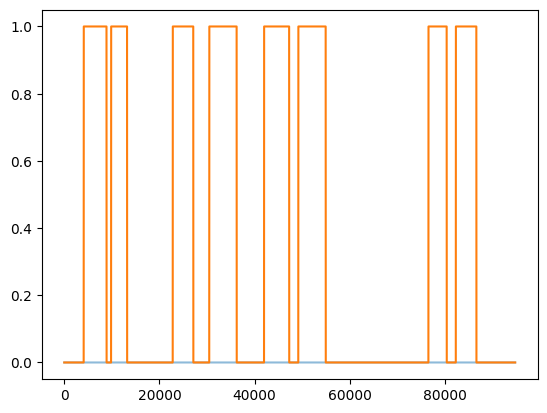

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE2_AN :25 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


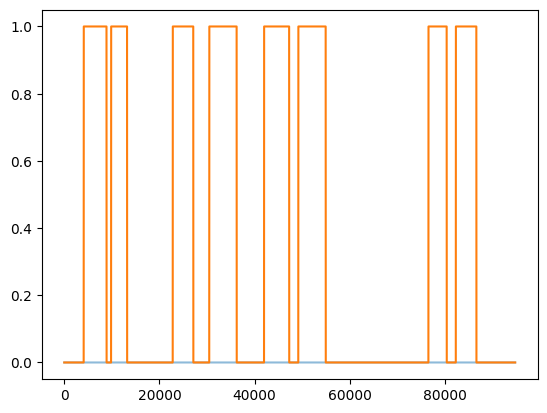

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE2_BN :26 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


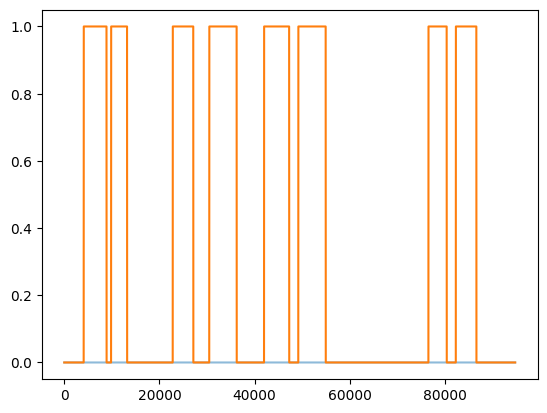

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE2_CN :27 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


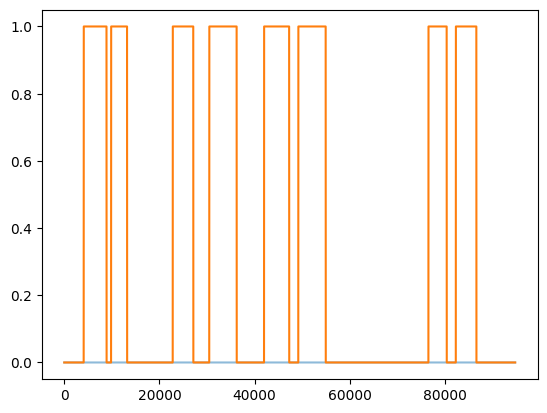

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE7_A :28 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


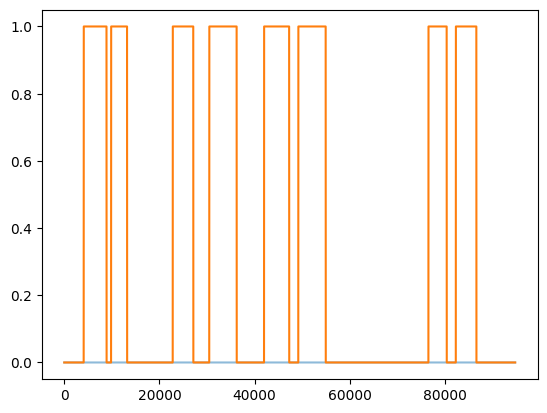

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE7_B :29 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


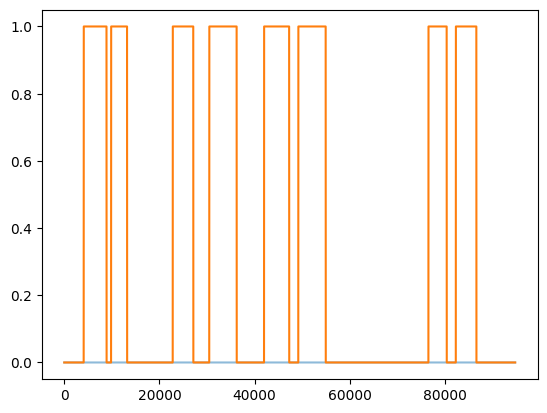

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE7_C :30 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


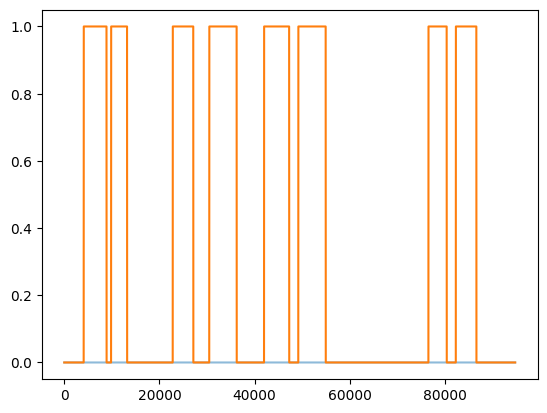

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE5_AN :32 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


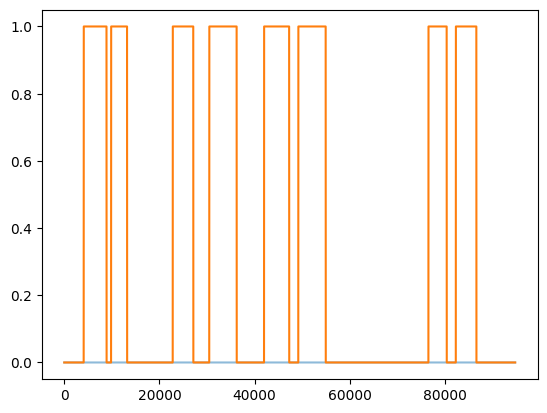

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE5_BN :33 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


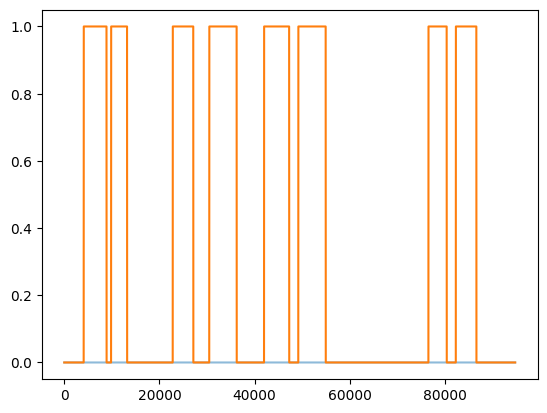

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE5_CN :34 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


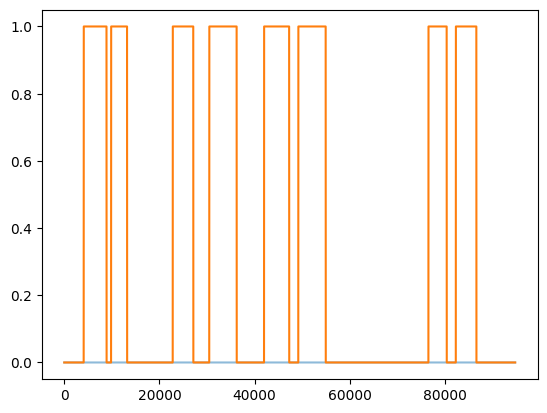

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE2_A :35 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


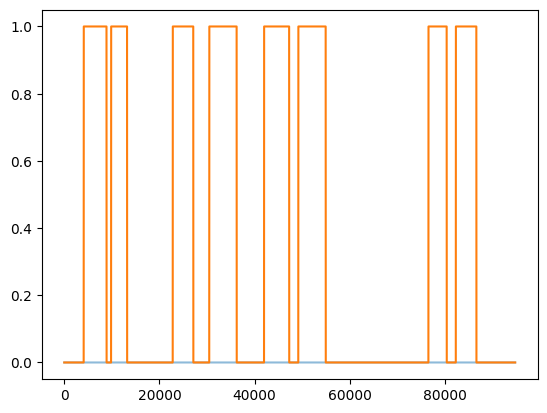

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE2_B :36 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


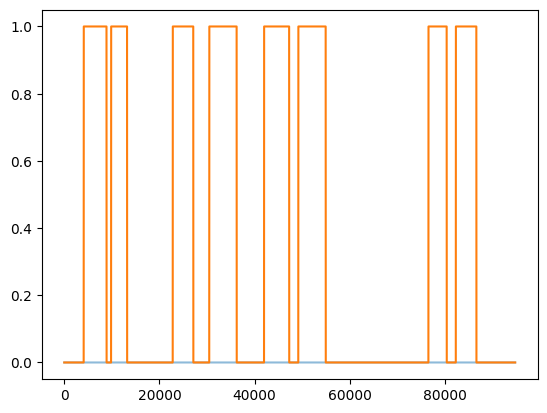

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE2_C :37 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


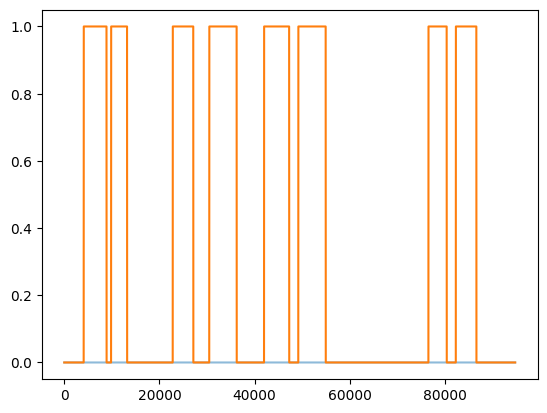

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE4_A :39 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


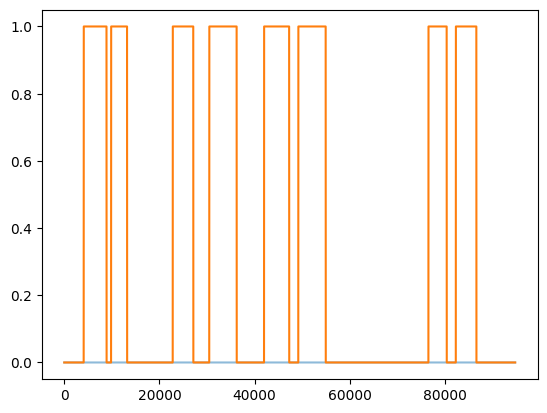

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE4_B :40 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


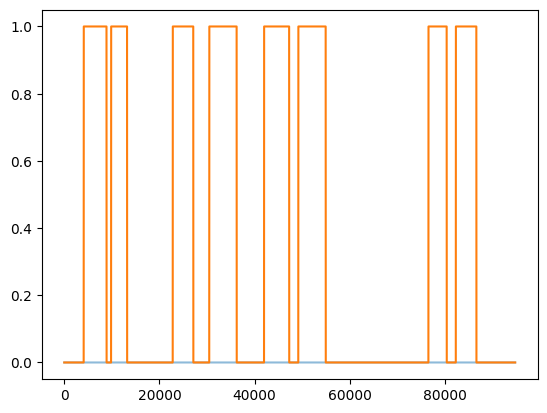

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE4_C :41 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


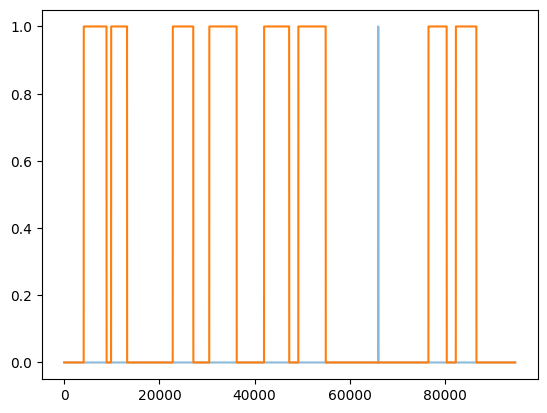

 C_CTWE6_A :43 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


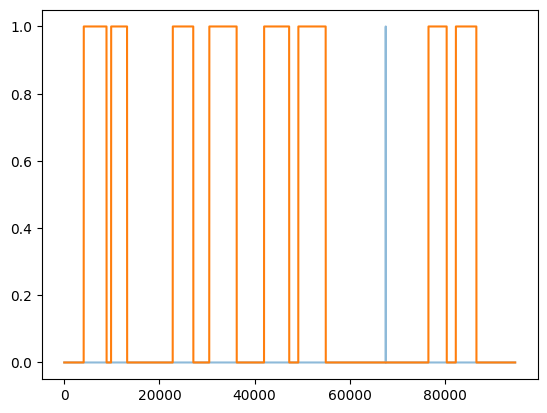

 C_CTWE6_B :44 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


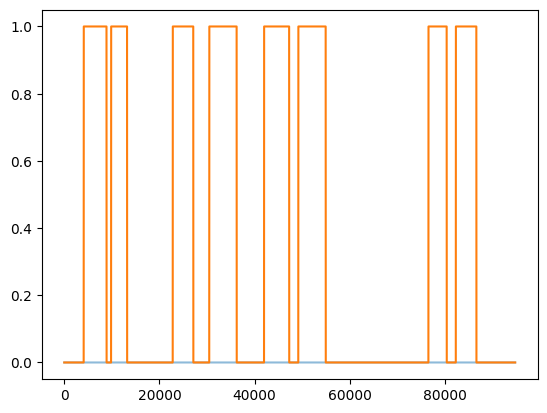

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE6_C :45 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


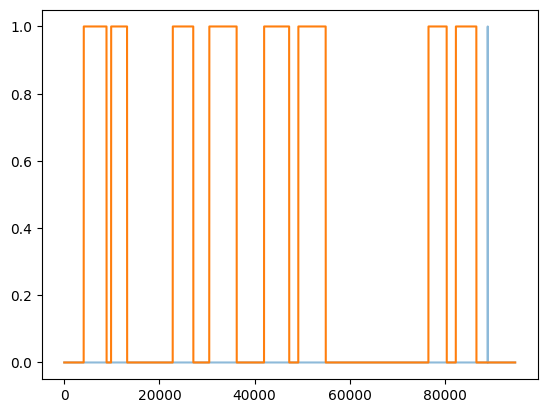

 C_CTWE10_A :47 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


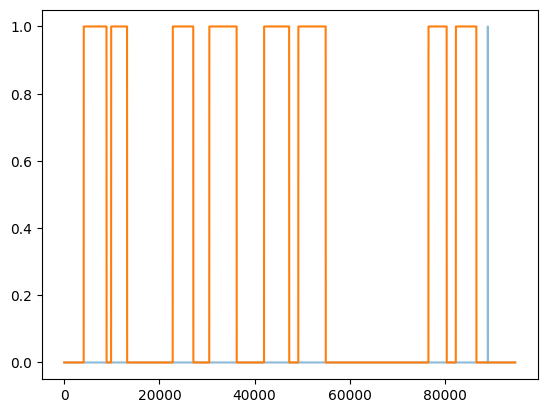

 C_CTWE10_B :48 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


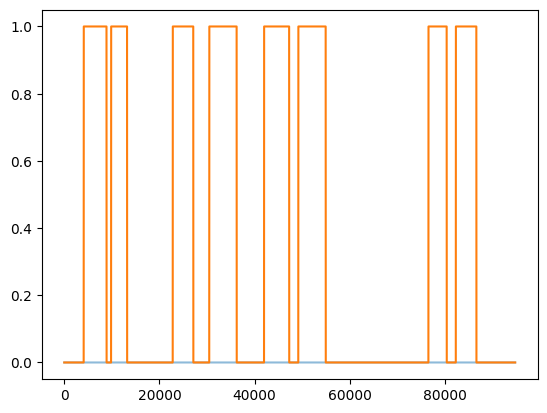

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE10_C :49 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


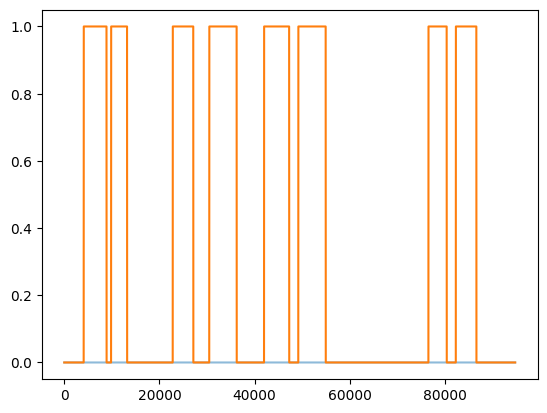

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE8_A :51 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


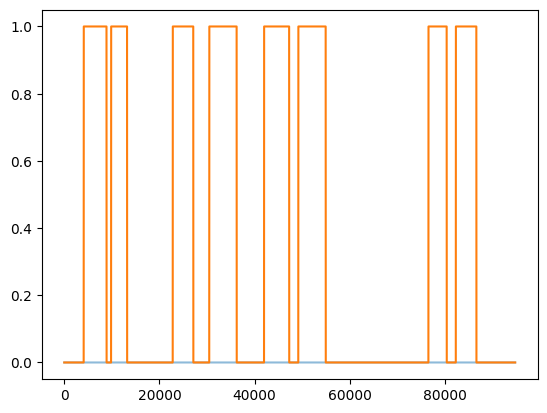

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE8_B :52 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


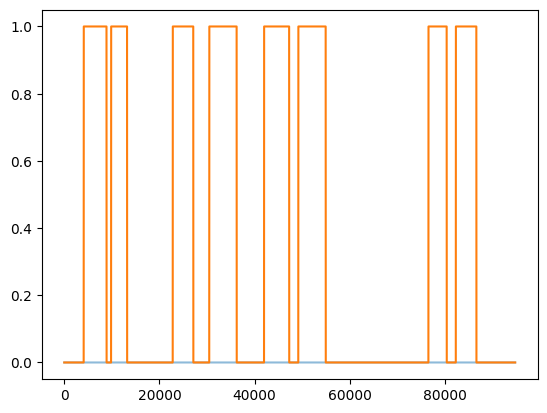

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE8_C :53 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


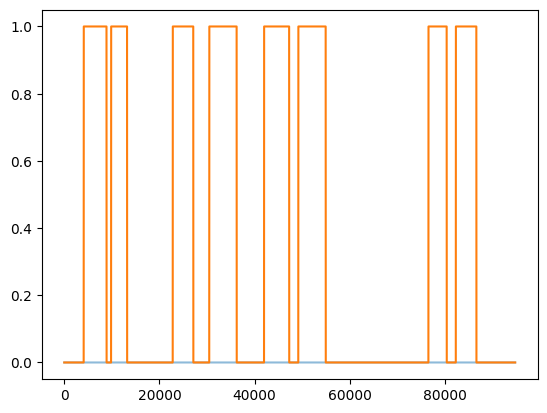

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_DIST1_AN :55 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


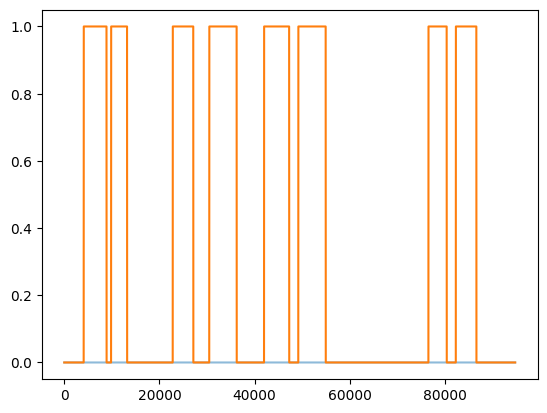

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_DIST1_BN :56 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


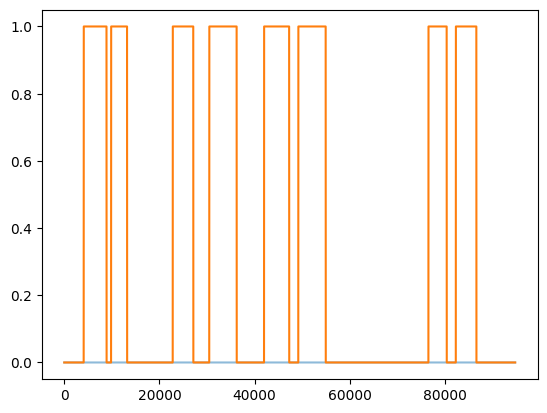

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_DIST1_CN :57 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


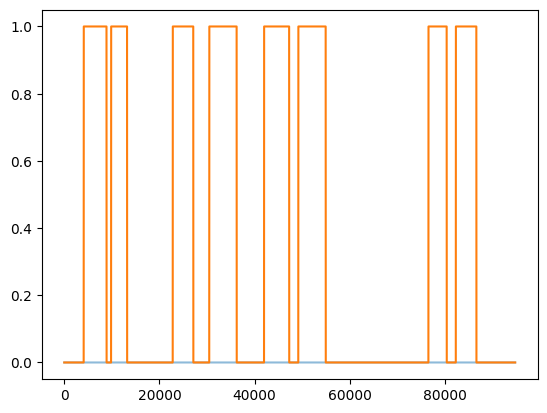

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_DIST1_A :58 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


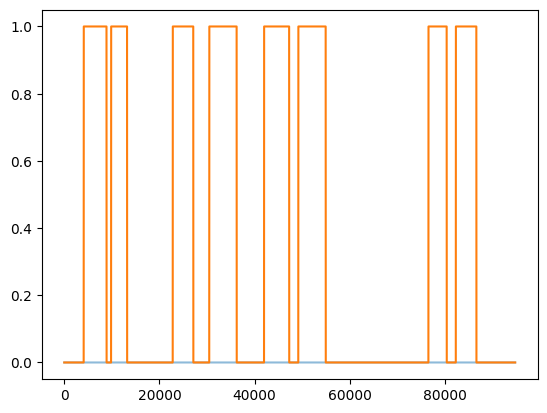

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_DIST1_B :59 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


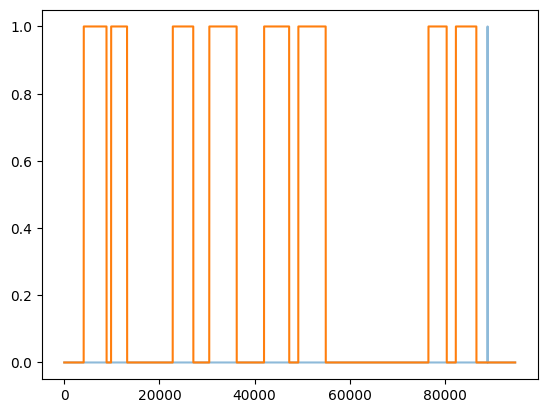

 C_CT_DIST1_C :60 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


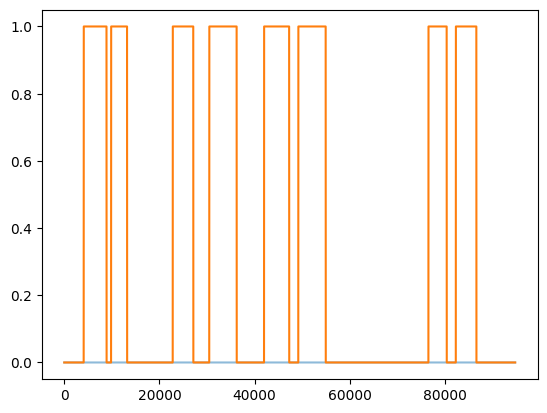

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_DIST2_AN :61 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


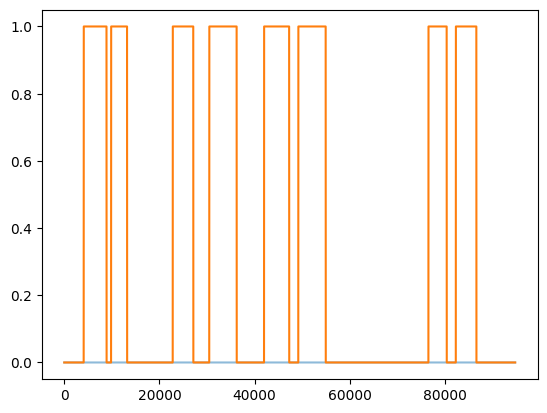

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_DIST2_BN :62 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


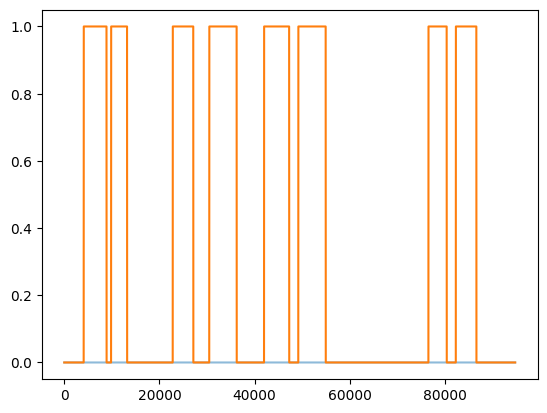

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_DIST2_CN :63 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


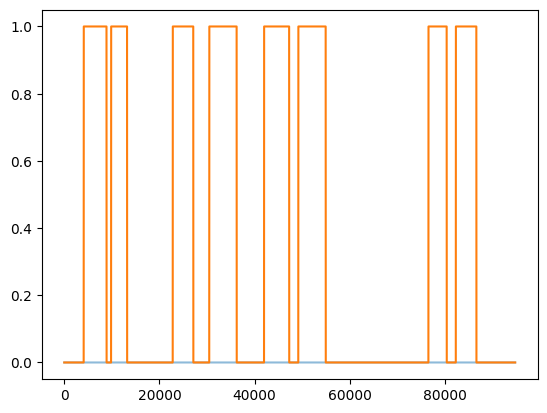

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_DIST2_A :64 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


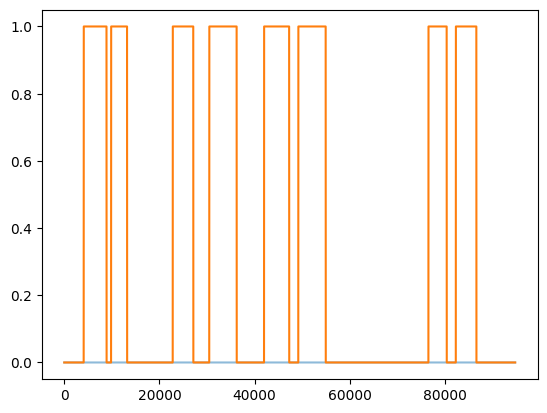

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_DIST2_B :65 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


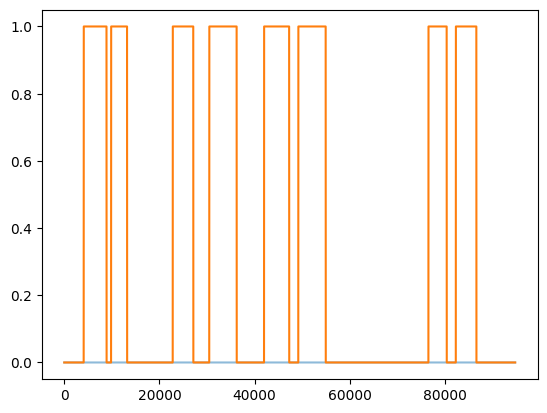

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_DIST2_C :66 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


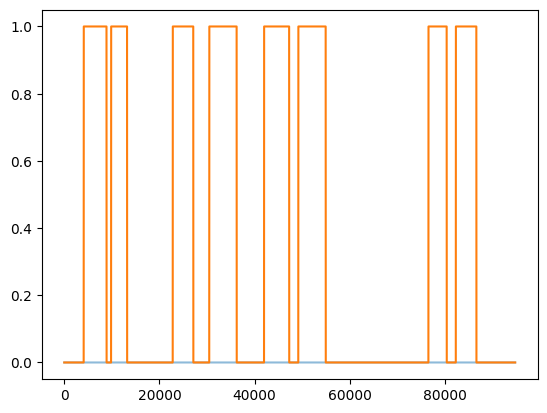

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR3_AN :67 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


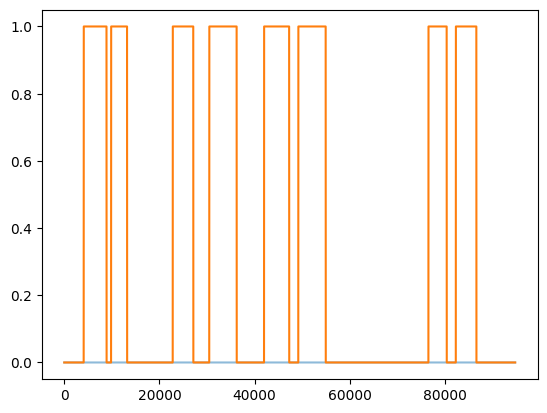

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR3_BN :68 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


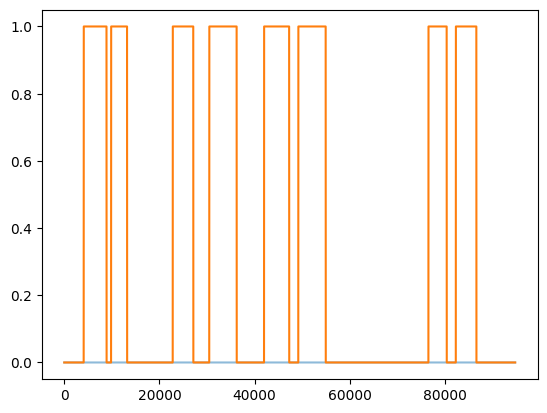

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR3_CN :69 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


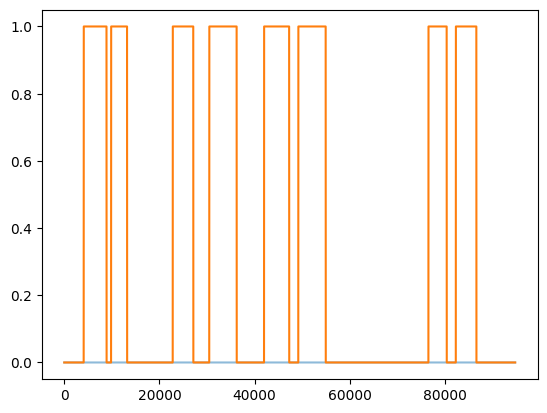

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR3_A :70 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


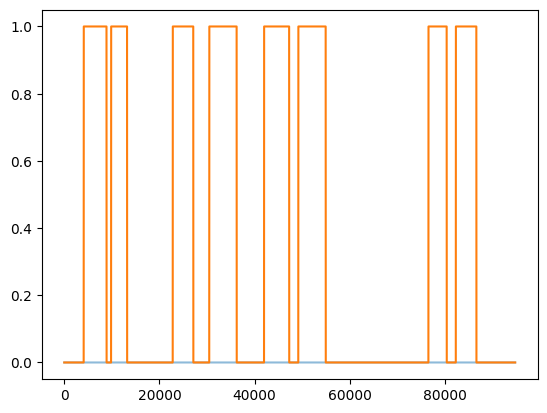

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR3_B :71 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


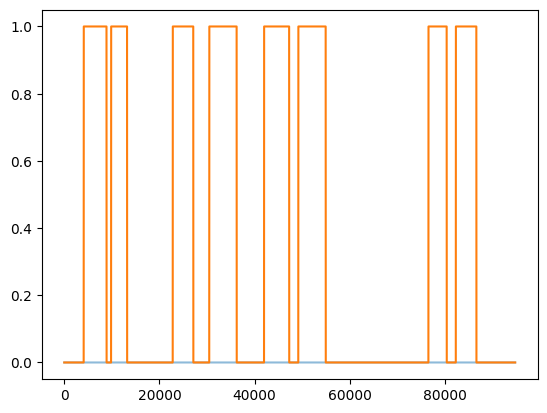

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR3_C :72 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


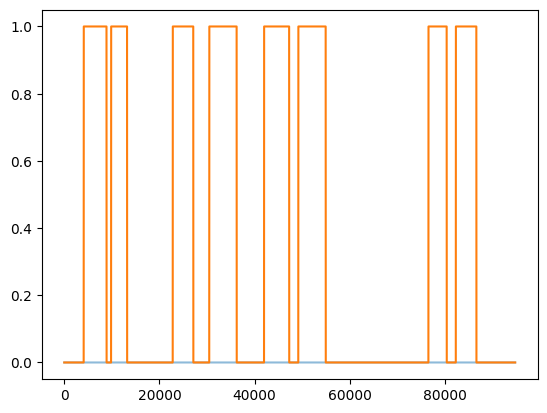

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR1_AN :73 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


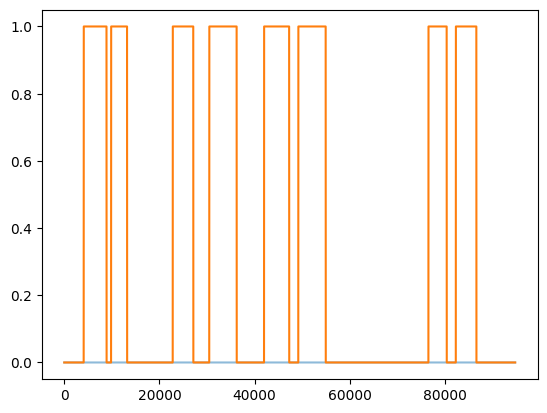

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR1_BN :74 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


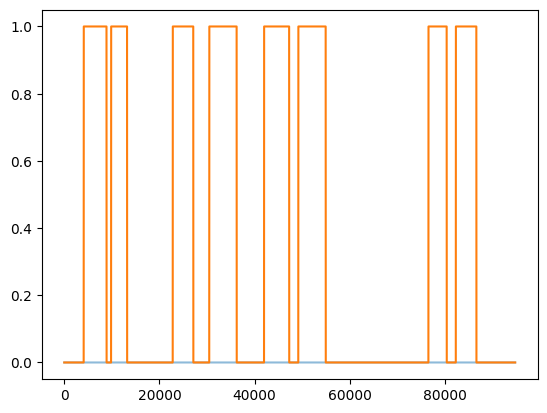

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR1_CN :75 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


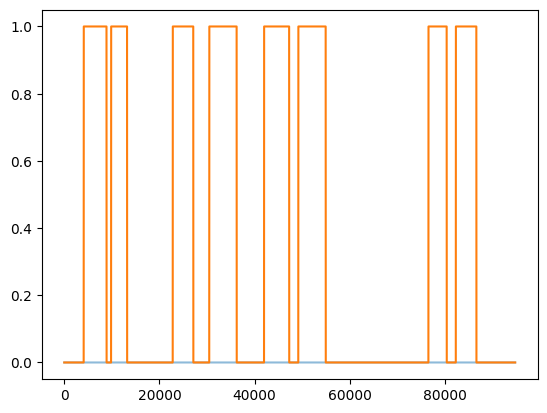

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR1_A :76 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


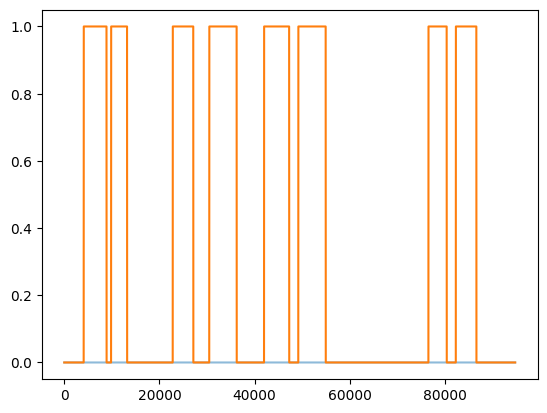

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR1_B :77 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


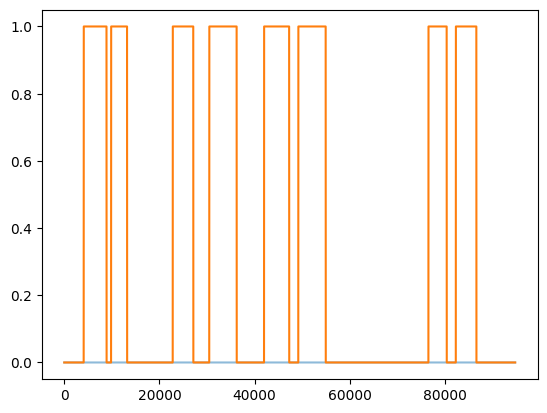

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR1_C :78 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


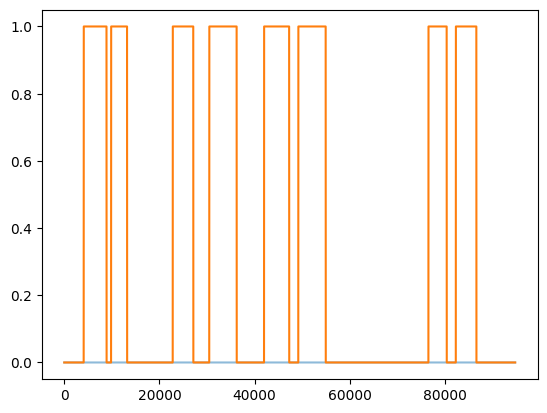

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR32_AN :79 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


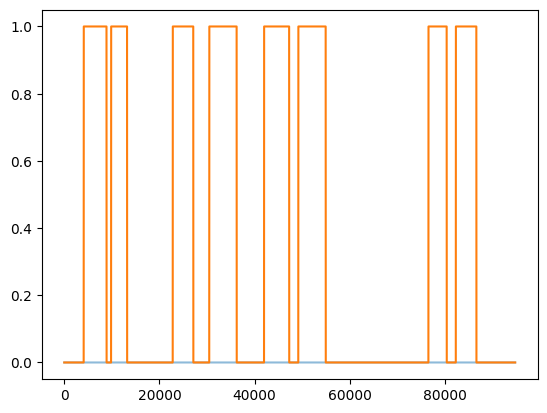

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR32_BN :80 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


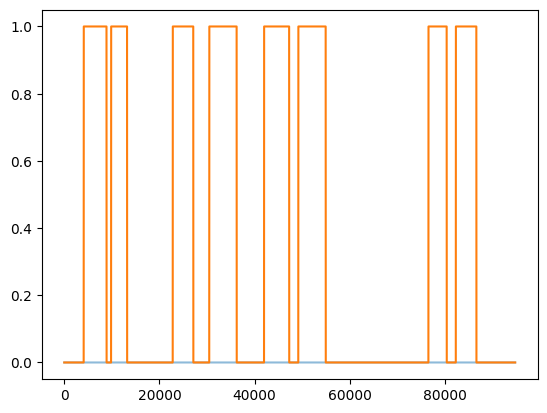

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR32_CN :81 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


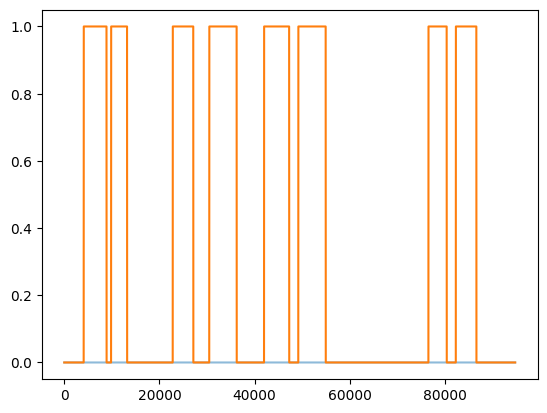

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR32_A :82 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


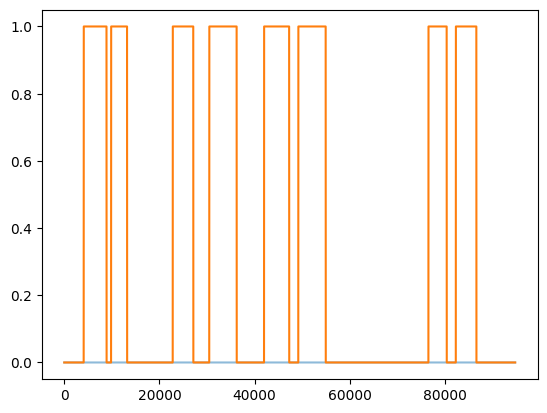

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR32_B :83 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


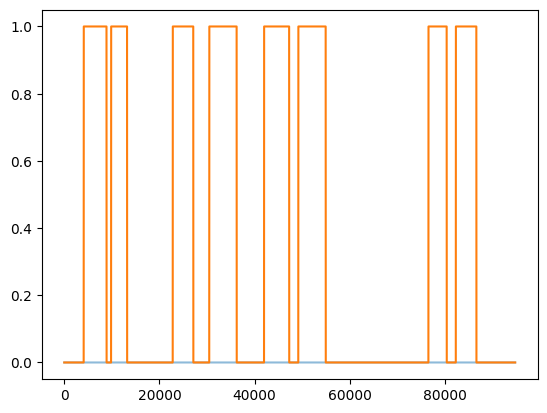

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR32_C :84 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


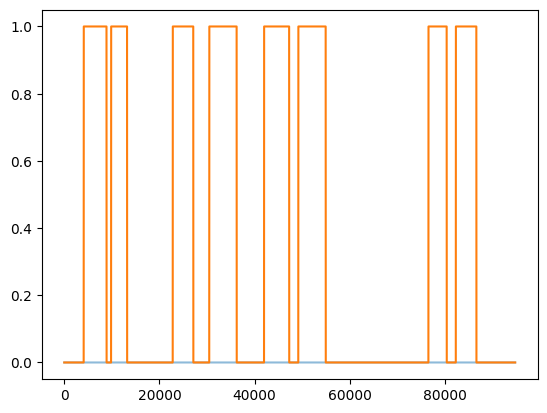

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR12_AN :85 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


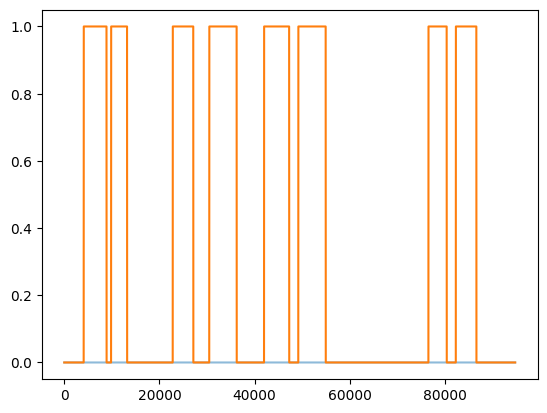

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR12_BN :86 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


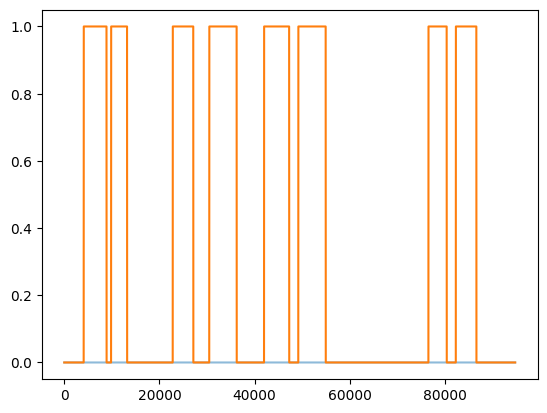

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_FDR12_CN :87 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


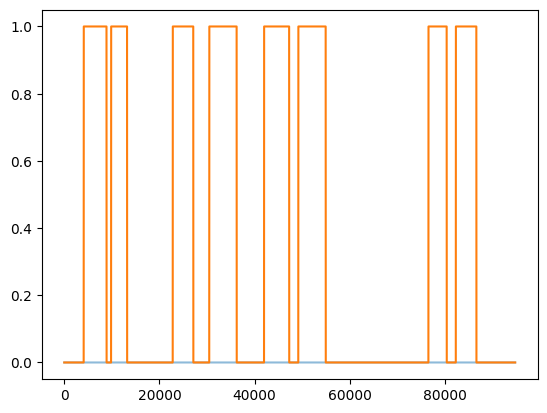

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR12_A :88 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


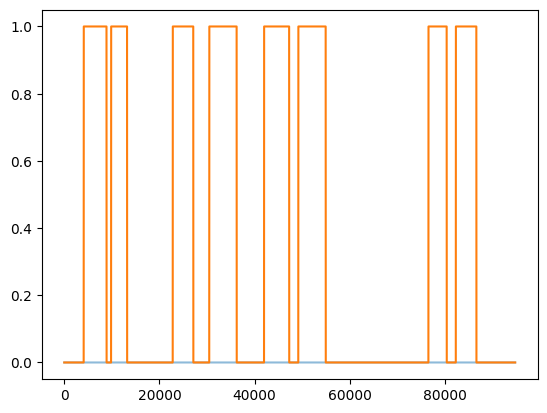

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR12_B :89 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


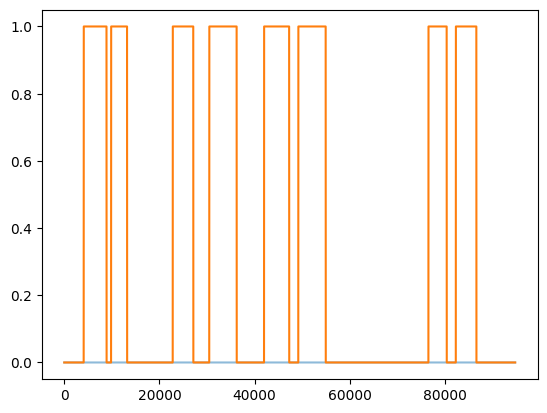

 C_CT_FDR12_C :90 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
co = 0
for var1_index, var2_indices in adj_list.items():
    set_zero = np.zeros(len(data_test))
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    violation = []

    for index, i in enumerate(rsum_list[co]):
      if i > thresholds[co]:
        set_zero[index]=1

    plt.plot(set_zero, alpha = 0.5)
    plt.plot(y_true)
    plt.show()
    accuracy, precision, recall, f1= get_scores(y_true, set_zero)
    ARL = average_run_length(set_zero, y_true)

    print(f"{cols[var1_index]} :{var1_index} has accuracy = {accuracy}, precision = {precision}, recall = {recall}, ARL = {ARL} and f1 = {f1}")
    co +=1